from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-08 15:24:25.188723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 15:24:25.521736: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 15:24:25.528107: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-08 15:24:25.528136: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
epochs = 50

In [3]:
df = pd.read_csv("data/LocationD.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)

WINDOW_SIZE = 3
BODD = df["BODD"]

X1, y1 = df_to_X_y(BODD, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

2024-03-08 15:24:28.030446: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-08 15:24:28.030493: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-08 15:24:28.030522: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-08 15:24:28.030834: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 794.0829 - root_mean_squared_error: 28.1795

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 238ms/step - loss: 794.0829 - root_mean_squared_error: 28.1795 - val_loss: 819.2228 - val_root_mean_squared_error: 28.6221
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 728.6172 - root_mean_squared_error: 26.9929

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 145ms/step - loss: 757.2667 - root_mean_squared_error: 27.5185 - val_loss: 771.8227 - val_root_mean_squared_error: 27.7817
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 758.9503 - root_mean_squared_error: 27.5491

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 176ms/step - loss: 711.6591 - root_mean_squared_error: 26.6769 - val_loss: 722.9995 - val_root_mean_squared_error: 26.8887
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 673.3390 - root_mean_squared_error: 25.9488

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 146ms/step - loss: 665.7130 - root_mean_squared_error: 25.8014 - val_loss: 675.3706 - val_root_mean_squared_error: 25.9879
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 602.6871 - root_mean_squared_error: 24.5497

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 121ms/step - loss: 621.0825 - root_mean_squared_error: 24.9215 - val_loss: 629.9550 - val_root_mean_squared_error: 25.0989
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 629.7220 - root_mean_squared_error: 25.0943

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 117ms/step - loss: 579.4402 - root_mean_squared_error: 24.0716 - val_loss: 586.2059 - val_root_mean_squared_error: 24.2117
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 514.6240 - root_mean_squared_error: 22.6853

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 129ms/step - loss: 538.4863 - root_mean_squared_error: 23.2053 - val_loss: 544.7239 - val_root_mean_squared_error: 23.3393
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 502.1973 - root_mean_squared_error: 22.4098

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 110ms/step - loss: 499.7087 - root_mean_squared_error: 22.3542 - val_loss: 504.7152 - val_root_mean_squared_error: 22.4659
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 482.9166 - root_mean_squared_error: 21.9754

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 106ms/step - loss: 462.7795 - root_mean_squared_error: 21.5123 - val_loss: 466.2372 - val_root_mean_squared_error: 21.5925
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 447.6936 - root_mean_squared_error: 21.1588

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 92ms/step - loss: 426.9514 - root_mean_squared_error: 20.6628 - val_loss: 429.8335 - val_root_mean_squared_error: 20.7324
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 408.3339 - root_mean_squared_error: 20.2073

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 94ms/step - loss: 393.6180 - root_mean_squared_error: 19.8398 - val_loss: 395.0611 - val_root_mean_squared_error: 19.8761
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 342.7882 - root_mean_squared_error: 18.5145

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 87ms/step - loss: 361.2813 - root_mean_squared_error: 19.0074 - val_loss: 362.1667 - val_root_mean_squared_error: 19.0307
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 298.3748 - root_mean_squared_error: 17.2735

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 112ms/step - loss: 330.6015 - root_mean_squared_error: 18.1825 - val_loss: 331.2123 - val_root_mean_squared_error: 18.1992
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 328.5704 - root_mean_squared_error: 18.1265

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 79ms/step - loss: 302.3204 - root_mean_squared_error: 17.3874 - val_loss: 301.7529 - val_root_mean_squared_error: 17.3710
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 281.0800 - root_mean_squared_error: 16.7654

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 86ms/step - loss: 275.0969 - root_mean_squared_error: 16.5860 - val_loss: 274.0323 - val_root_mean_squared_error: 16.5539
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 267.5430 - root_mean_squared_error: 16.3567

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 101ms/step - loss: 249.4033 - root_mean_squared_error: 15.7925 - val_loss: 247.9880 - val_root_mean_squared_error: 15.7476
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 246.5487 - root_mean_squared_error: 15.7019

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 109ms/step - loss: 225.4987 - root_mean_squared_error: 15.0166 - val_loss: 223.6847 - val_root_mean_squared_error: 14.9561
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 235.1345 - root_mean_squared_error: 15.3341

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 116ms/step - loss: 203.2727 - root_mean_squared_error: 14.2574 - val_loss: 201.1511 - val_root_mean_squared_error: 14.1828
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 186.5405 - root_mean_squared_error: 13.6580

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 116ms/step - loss: 182.4672 - root_mean_squared_error: 13.5080 - val_loss: 180.2711 - val_root_mean_squared_error: 13.4265
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 163.7841 - root_mean_squared_error: 12.7978

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 106ms/step - loss: 163.2899 - root_mean_squared_error: 12.7785 - val_loss: 160.8292 - val_root_mean_squared_error: 12.6818
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 147.1741 - root_mean_squared_error: 12.1315

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 204ms/step - loss: 145.5678 - root_mean_squared_error: 12.0651 - val_loss: 142.6839 - val_root_mean_squared_error: 11.9450
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 138.3635 - root_mean_squared_error: 11.7628

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 125ms/step - loss: 128.8792 - root_mean_squared_error: 11.3525 - val_loss: 126.1562 - val_root_mean_squared_error: 11.2319
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 115.8968 - root_mean_squared_error: 10.7655

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 132ms/step - loss: 113.8576 - root_mean_squared_error: 10.6704 - val_loss: 111.0672 - val_root_mean_squared_error: 10.5388
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 101.6952 - root_mean_squared_error: 10.0844

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 120ms/step - loss: 100.0192 - root_mean_squared_error: 10.0010 - val_loss: 97.3030 - val_root_mean_squared_error: 9.8642
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 92.8448 - root_mean_squared_error: 9.6356

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 108ms/step - loss: 87.4831 - root_mean_squared_error: 9.3532 - val_loss: 84.8042 - val_root_mean_squared_error: 9.2089
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 75.9315 - root_mean_squared_error: 8.7139

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 133ms/step - loss: 76.1307 - root_mean_squared_error: 8.7253 - val_loss: 73.5204 - val_root_mean_squared_error: 8.5744
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 70.3304 - root_mean_squared_error: 8.3863

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 135ms/step - loss: 65.9914 - root_mean_squared_error: 8.1235 - val_loss: 63.4943 - val_root_mean_squared_error: 7.9683
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 64.3101 - root_mean_squared_error: 8.0194

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 132ms/step - loss: 56.9444 - root_mean_squared_error: 7.5461 - val_loss: 54.5762 - val_root_mean_squared_error: 7.3876
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 47.7518 - root_mean_squared_error: 6.9103

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 123ms/step - loss: 48.8610 - root_mean_squared_error: 6.9901 - val_loss: 46.6762 - val_root_mean_squared_error: 6.8320
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 47.2098 - root_mean_squared_error: 6.8709

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 136ms/step - loss: 41.6955 - root_mean_squared_error: 6.4572 - val_loss: 39.6725 - val_root_mean_squared_error: 6.2986
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 38.6894 - root_mean_squared_error: 6.2201

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 115ms/step - loss: 35.3664 - root_mean_squared_error: 5.9470 - val_loss: 33.5221 - val_root_mean_squared_error: 5.7898
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 33.2590 - root_mean_squared_error: 5.7671

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 133ms/step - loss: 29.8814 - root_mean_squared_error: 5.4664 - val_loss: 28.1224 - val_root_mean_squared_error: 5.3031
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 30.5600 - root_mean_squared_error: 5.5281

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 120ms/step - loss: 25.0774 - root_mean_squared_error: 5.0077 - val_loss: 23.5232 - val_root_mean_squared_error: 4.8501
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 23.8595 - root_mean_squared_error: 4.8846

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 110ms/step - loss: 21.0133 - root_mean_squared_error: 4.5840 - val_loss: 19.5695 - val_root_mean_squared_error: 4.4237
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 20.6060 - root_mean_squared_error: 4.5394

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 118ms/step - loss: 17.4796 - root_mean_squared_error: 4.1809 - val_loss: 16.2399 - val_root_mean_squared_error: 4.0299
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 17.2287 - root_mean_squared_error: 4.1507

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 110ms/step - loss: 14.5200 - root_mean_squared_error: 3.8105 - val_loss: 13.4041 - val_root_mean_squared_error: 3.6612
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 12.8991 - root_mean_squared_error: 3.5915

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 109ms/step - loss: 12.0097 - root_mean_squared_error: 3.4655 - val_loss: 11.0455 - val_root_mean_squared_error: 3.3235
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 11.8734 - root_mean_squared_error: 3.4458

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 146ms/step - loss: 9.9323 - root_mean_squared_error: 3.1515 - val_loss: 9.0850 - val_root_mean_squared_error: 3.0141
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 7.5904 - root_mean_squared_error: 2.7551

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 112ms/step - loss: 8.1803 - root_mean_squared_error: 2.8601 - val_loss: 7.4370 - val_root_mean_squared_error: 2.7271
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 8.8086 - root_mean_squared_error: 2.9679

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 124ms/step - loss: 6.7534 - root_mean_squared_error: 2.5987 - val_loss: 6.0779 - val_root_mean_squared_error: 2.4653
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 5.1519 - root_mean_squared_error: 2.2698

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 120ms/step - loss: 5.5376 - root_mean_squared_error: 2.3532 - val_loss: 4.9945 - val_root_mean_squared_error: 2.2348
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 5.9761 - root_mean_squared_error: 2.4446

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 130ms/step - loss: 4.5974 - root_mean_squared_error: 2.1442 - val_loss: 4.0801 - val_root_mean_squared_error: 2.0199
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2.9426 - root_mean_squared_error: 1.7154

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 111ms/step - loss: 3.7930 - root_mean_squared_error: 1.9476 - val_loss: 3.3581 - val_root_mean_squared_error: 1.8325
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 4.4297 - root_mean_squared_error: 2.1047

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 113ms/step - loss: 3.1651 - root_mean_squared_error: 1.7791 - val_loss: 2.7819 - val_root_mean_squared_error: 1.6679
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 1.8800 - root_mean_squared_error: 1.3711

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 135ms/step - loss: 2.6489 - root_mean_squared_error: 1.6275 - val_loss: 2.3308 - val_root_mean_squared_error: 1.5267
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 3.5367 - root_mean_squared_error: 1.8806

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 118ms/step - loss: 2.2658 - root_mean_squared_error: 1.5053 - val_loss: 1.9534 - val_root_mean_squared_error: 1.3976
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2.8565 - root_mean_squared_error: 1.6901

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 129ms/step - loss: 1.9337 - root_mean_squared_error: 1.3906 - val_loss: 1.6633 - val_root_mean_squared_error: 1.2897
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 1.2767 - root_mean_squared_error: 1.1299

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 97ms/step - loss: 1.6824 - root_mean_squared_error: 1.2971 - val_loss: 1.4340 - val_root_mean_squared_error: 1.1975
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 1.8407 - root_mean_squared_error: 1.3567

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 137ms/step - loss: 1.4760 - root_mean_squared_error: 1.2149 - val_loss: 1.2543 - val_root_mean_squared_error: 1.1200
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 0.7517 - root_mean_squared_error: 0.8670

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 0s 3ms/step


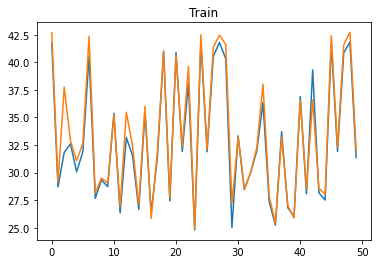

2/2 [==============================] - 0s 5ms/step


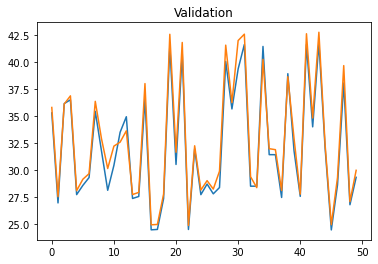

3/3 [==============================] - 0s 4ms/step


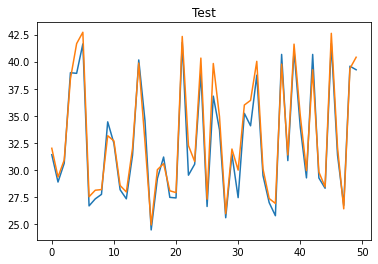

3/3 [==============================] - 0s 4ms/step


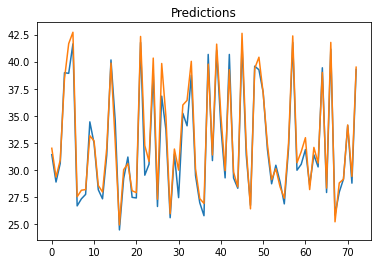

In [4]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
1/8 [==>...........................] - ETA: 26s - loss: 1215.3049 - root_mean_squared_error: 34.8612

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 917ms/step - loss: 1102.9911 - root_mean_squared_error: 33.2113 - val_loss: 1160.0052 - val_root_mean_squared_error: 34.0588
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 1106.1318 - root_mean_squared_error: 33.2586

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 827ms/step - loss: 1095.9086 - root_mean_squared_error: 33.1045 - val_loss: 1152.8127 - val_root_mean_squared_error: 33.9531
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1088.8442 - root_mean_squared_error: 32.9976

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 801ms/step - loss: 1088.8442 - root_mean_squared_error: 32.9976 - val_loss: 1145.6118 - val_root_mean_squared_error: 33.8469
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 1047.9360 - root_mean_squared_error: 32.3718

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 892ms/step - loss: 1081.7516 - root_mean_squared_error: 32.8900 - val_loss: 1138.3910 - val_root_mean_squared_error: 33.7401
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 1074.6748 - root_mean_squared_error: 32.7822

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 818ms/step - loss: 1074.6748 - root_mean_squared_error: 32.7822 - val_loss: 1131.1437 - val_root_mean_squared_error: 33.6325
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 1125.6630 - root_mean_squared_error: 33.5509

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 920ms/step - loss: 1067.5708 - root_mean_squared_error: 32.6737 - val_loss: 1123.8899 - val_root_mean_squared_error: 33.5245
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 1080.4031 - root_mean_squared_error: 32.8695

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 763ms/step - loss: 1060.4193 - root_mean_squared_error: 32.5641 - val_loss: 1116.6075 - val_root_mean_squared_error: 33.4157
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 1053.2401 - root_mean_squared_error: 32.4537

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 769ms/step - loss: 1053.2401 - root_mean_squared_error: 32.4537 - val_loss: 1109.2415 - val_root_mean_squared_error: 33.3053
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 998.6940 - root_mean_squared_error: 31.6021

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 865ms/step - loss: 1045.9724 - root_mean_squared_error: 32.3415 - val_loss: 1101.8074 - val_root_mean_squared_error: 33.1935
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 1075.0862 - root_mean_squared_error: 32.7885

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 828ms/step - loss: 1038.6554 - root_mean_squared_error: 32.2282 - val_loss: 1094.2465 - val_root_mean_squared_error: 33.0794
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 1052.1906 - root_mean_squared_error: 32.4375

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 765ms/step - loss: 1031.2045 - root_mean_squared_error: 32.1124 - val_loss: 1086.5522 - val_root_mean_squared_error: 32.9629
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 1155.6847 - root_mean_squared_error: 33.9954

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 757ms/step - loss: 1023.5874 - root_mean_squared_error: 31.9936 - val_loss: 1078.7269 - val_root_mean_squared_error: 32.8440
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 994.9001 - root_mean_squared_error: 31.5420

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 7s 939ms/step - loss: 1015.8244 - root_mean_squared_error: 31.8720 - val_loss: 1070.6852 - val_root_mean_squared_error: 32.7213
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 1061.2031 - root_mean_squared_error: 32.5761

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 7s 941ms/step - loss: 1007.8499 - root_mean_squared_error: 31.7467 - val_loss: 1062.4659 - val_root_mean_squared_error: 32.5955
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 999.6750 - root_mean_squared_error: 31.6176

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 865ms/step - loss: 999.6750 - root_mean_squared_error: 31.6176 - val_loss: 1054.0103 - val_root_mean_squared_error: 32.4655
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 947.1648 - root_mean_squared_error: 30.7760

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 919ms/step - loss: 991.3026 - root_mean_squared_error: 31.4850 - val_loss: 1045.3313 - val_root_mean_squared_error: 32.3316
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 944.5938 - root_mean_squared_error: 30.7342

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 746ms/step - loss: 982.6890 - root_mean_squared_error: 31.3479 - val_loss: 1036.4172 - val_root_mean_squared_error: 32.1934
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 994.4099 - root_mean_squared_error: 31.5343

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 758ms/step - loss: 973.8685 - root_mean_squared_error: 31.2069 - val_loss: 1027.3114 - val_root_mean_squared_error: 32.0517
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 1069.6605 - root_mean_squared_error: 32.7057

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 861ms/step - loss: 964.9103 - root_mean_squared_error: 31.0630 - val_loss: 1018.0059 - val_root_mean_squared_error: 31.9062
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 926.2139 - root_mean_squared_error: 30.4338

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 763ms/step - loss: 955.7512 - root_mean_squared_error: 30.9152 - val_loss: 1008.6282 - val_root_mean_squared_error: 31.7589
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 968.0637 - root_mean_squared_error: 31.1137

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 903ms/step - loss: 946.5389 - root_mean_squared_error: 30.7659 - val_loss: 999.1759 - val_root_mean_squared_error: 31.6097
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 929.1382 - root_mean_squared_error: 30.4818

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 757ms/step - loss: 937.2670 - root_mean_squared_error: 30.6148 - val_loss: 989.6295 - val_root_mean_squared_error: 31.4584
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 1032.7102 - root_mean_squared_error: 32.1358

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 830ms/step - loss: 927.9290 - root_mean_squared_error: 30.4619 - val_loss: 980.0267 - val_root_mean_squared_error: 31.3054
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 880.6744 - root_mean_squared_error: 29.6762

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 805ms/step - loss: 918.4933 - root_mean_squared_error: 30.3067 - val_loss: 970.4547 - val_root_mean_squared_error: 31.1521
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 887.7964 - root_mean_squared_error: 29.7959

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 818ms/step - loss: 909.1059 - root_mean_squared_error: 30.1514 - val_loss: 960.8038 - val_root_mean_squared_error: 30.9968
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 838.4959 - root_mean_squared_error: 28.9568

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 822ms/step - loss: 899.6255 - root_mean_squared_error: 29.9938 - val_loss: 951.0356 - val_root_mean_squared_error: 30.8389
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 887.7030 - root_mean_squared_error: 29.7943

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 794ms/step - loss: 889.9884 - root_mean_squared_error: 29.8327 - val_loss: 941.1672 - val_root_mean_squared_error: 30.6784
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 887.2376 - root_mean_squared_error: 29.7865

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 855ms/step - loss: 880.1962 - root_mean_squared_error: 29.6681 - val_loss: 931.0547 - val_root_mean_squared_error: 30.5132
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 824.8497 - root_mean_squared_error: 28.7202

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 751ms/step - loss: 870.1220 - root_mean_squared_error: 29.4978 - val_loss: 920.6278 - val_root_mean_squared_error: 30.3418
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 867.4125 - root_mean_squared_error: 29.4519

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 790ms/step - loss: 859.6792 - root_mean_squared_error: 29.3203 - val_loss: 909.7388 - val_root_mean_squared_error: 30.1619
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 896.0621 - root_mean_squared_error: 29.9343

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 834ms/step - loss: 848.7631 - root_mean_squared_error: 29.1335 - val_loss: 898.3241 - val_root_mean_squared_error: 29.9721
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 852.6423 - root_mean_squared_error: 29.2000

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 867ms/step - loss: 837.2636 - root_mean_squared_error: 28.9355 - val_loss: 886.2692 - val_root_mean_squared_error: 29.7703
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 817.8931 - root_mean_squared_error: 28.5988

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 796ms/step - loss: 825.2111 - root_mean_squared_error: 28.7265 - val_loss: 873.6376 - val_root_mean_squared_error: 29.5574
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 798.9791 - root_mean_squared_error: 28.2662

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 754ms/step - loss: 812.6509 - root_mean_squared_error: 28.5070 - val_loss: 860.6952 - val_root_mean_squared_error: 29.3376
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 800.0294 - root_mean_squared_error: 28.2848

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 871ms/step - loss: 800.0294 - root_mean_squared_error: 28.2848 - val_loss: 847.6508 - val_root_mean_squared_error: 29.1144
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 726.4507 - root_mean_squared_error: 26.9527

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 766ms/step - loss: 787.3615 - root_mean_squared_error: 28.0600 - val_loss: 834.7854 - val_root_mean_squared_error: 28.8927
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 711.0396 - root_mean_squared_error: 26.6653

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 641ms/step - loss: 774.9570 - root_mean_squared_error: 27.8380 - val_loss: 822.1597 - val_root_mean_squared_error: 28.6733
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 782.6243 - root_mean_squared_error: 27.9754

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 769ms/step - loss: 762.8630 - root_mean_squared_error: 27.6200 - val_loss: 809.7581 - val_root_mean_squared_error: 28.4562
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 823.4940 - root_mean_squared_error: 28.6966

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 666ms/step - loss: 751.0547 - root_mean_squared_error: 27.4054 - val_loss: 797.6071 - val_root_mean_squared_error: 28.2419
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 798.7881 - root_mean_squared_error: 28.2628

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 610ms/step - loss: 739.5612 - root_mean_squared_error: 27.1949 - val_loss: 785.8463 - val_root_mean_squared_error: 28.0330
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 706.4185 - root_mean_squared_error: 26.5785

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 615ms/step - loss: 728.3771 - root_mean_squared_error: 26.9885 - val_loss: 774.5446 - val_root_mean_squared_error: 27.8306
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 770.2500 - root_mean_squared_error: 27.7534

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 711ms/step - loss: 717.6375 - root_mean_squared_error: 26.7888 - val_loss: 763.6713 - val_root_mean_squared_error: 27.6346
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 742.0335 - root_mean_squared_error: 27.2403

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 437ms/step - loss: 707.3998 - root_mean_squared_error: 26.5970 - val_loss: 753.2529 - val_root_mean_squared_error: 27.4455
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 669.3696 - root_mean_squared_error: 25.8722

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 417ms/step - loss: 697.5693 - root_mean_squared_error: 26.4115 - val_loss: 743.3435 - val_root_mean_squared_error: 27.2643
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 687.8372 - root_mean_squared_error: 26.2267

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 479ms/step - loss: 688.1741 - root_mean_squared_error: 26.2331 - val_loss: 733.8789 - val_root_mean_squared_error: 27.0902
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 817.5444 - root_mean_squared_error: 28.5927

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 467ms/step - loss: 679.1860 - root_mean_squared_error: 26.0612 - val_loss: 724.6433 - val_root_mean_squared_error: 26.9192
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 701.3618 - root_mean_squared_error: 26.4832

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 461ms/step - loss: 670.3644 - root_mean_squared_error: 25.8914 - val_loss: 715.6882 - val_root_mean_squared_error: 26.7523
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 637.4208 - root_mean_squared_error: 25.2472

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 637ms/step - loss: 661.8193 - root_mean_squared_error: 25.7258 - val_loss: 706.9114 - val_root_mean_squared_error: 26.5878
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 653.4102 - root_mean_squared_error: 25.5619

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 648ms/step - loss: 653.4102 - root_mean_squared_error: 25.5619 - val_loss: 698.2942 - val_root_mean_squared_error: 26.4253
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 597.2929 - root_mean_squared_error: 24.4396

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 1s 3ms/step


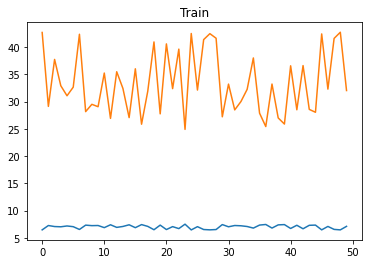

2/2 [==============================] - 1s 5ms/step


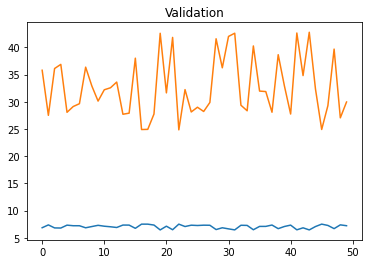

3/3 [==============================] - 0s 3ms/step


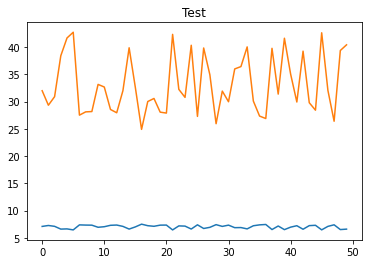

3/3 [==============================] - 0s 3ms/step


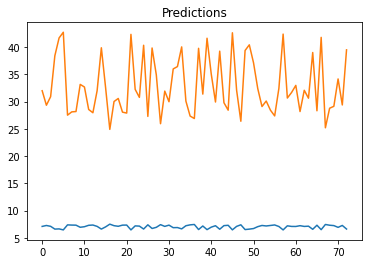

In [5]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
1/8 [==>...........................] - ETA: 17s - loss: 1035.3533 - root_mean_squared_error: 32.1769

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 791ms/step - loss: 1048.3987 - root_mean_squared_error: 32.3790 - val_loss: 1104.8812 - val_root_mean_squared_error: 33.2398
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1044.2449 - root_mean_squared_error: 32.3148

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 841ms/step - loss: 1044.2449 - root_mean_squared_error: 32.3148 - val_loss: 1100.6765 - val_root_mean_squared_error: 33.1764
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 1117.1211 - root_mean_squared_error: 33.4234

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 948ms/step - loss: 1039.8696 - root_mean_squared_error: 32.2470 - val_loss: 1095.6748 - val_root_mean_squared_error: 33.1010
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 947.8249 - root_mean_squared_error: 30.7868

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 992ms/step - loss: 1034.7772 - root_mean_squared_error: 32.1680 - val_loss: 1090.4318 - val_root_mean_squared_error: 33.0217
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 1062.0551 - root_mean_squared_error: 32.5892

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 905ms/step - loss: 1029.6334 - root_mean_squared_error: 32.0879 - val_loss: 1085.2343 - val_root_mean_squared_error: 32.9429
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 1014.2951 - root_mean_squared_error: 31.8480

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 1s/step - loss: 1024.5232 - root_mean_squared_error: 32.0082 - val_loss: 1080.1213 - val_root_mean_squared_error: 32.8652
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 1026.6484 - root_mean_squared_error: 32.0414

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 922ms/step - loss: 1019.5040 - root_mean_squared_error: 31.9297 - val_loss: 1075.0575 - val_root_mean_squared_error: 32.7881
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 1046.4702 - root_mean_squared_error: 32.3492

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 1s/step - loss: 1014.5148 - root_mean_squared_error: 31.8514 - val_loss: 1070.0471 - val_root_mean_squared_error: 32.7116
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 1009.5571 - root_mean_squared_error: 31.7735

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 983ms/step - loss: 1009.5571 - root_mean_squared_error: 31.7735 - val_loss: 1065.0309 - val_root_mean_squared_error: 32.6348
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 993.1066 - root_mean_squared_error: 31.5136 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 941ms/step - loss: 1004.5643 - root_mean_squared_error: 31.6949 - val_loss: 1059.9631 - val_root_mean_squared_error: 32.5571
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 948.9050 - root_mean_squared_error: 30.8043

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 999.5166 - root_mean_squared_error: 31.6151 - val_loss: 1054.8217 - val_root_mean_squared_error: 32.4780
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 993.9550 - root_mean_squared_error: 31.5271

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 994.3515 - root_mean_squared_error: 31.5333 - val_loss: 1049.5297 - val_root_mean_squared_error: 32.3964
Epoch 13/50
4/8 [==============>...............] - ETA: 0s - loss: 965.9153 - root_mean_squared_error: 31.0792

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 989.0330 - root_mean_squared_error: 31.4489 - val_loss: 1044.0597 - val_root_mean_squared_error: 32.3119
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 991.5392 - root_mean_squared_error: 31.4887

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 983.5068 - root_mean_squared_error: 31.3609 - val_loss: 1038.3202 - val_root_mean_squared_error: 32.2230
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 1034.3157 - root_mean_squared_error: 32.1608

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 977.7948 - root_mean_squared_error: 31.2697 - val_loss: 1032.8790 - val_root_mean_squared_error: 32.1384
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 970.6279 - root_mean_squared_error: 31.1549

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 946ms/step - loss: 972.6012 - root_mean_squared_error: 31.1866 - val_loss: 1027.4852 - val_root_mean_squared_error: 32.0544
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 849.3008 - root_mean_squared_error: 29.1428

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 966.9660 - root_mean_squared_error: 31.0961 - val_loss: 1021.6487 - val_root_mean_squared_error: 31.9632
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 995.6266 - root_mean_squared_error: 31.5536

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 960.8559 - root_mean_squared_error: 30.9977 - val_loss: 1015.1353 - val_root_mean_squared_error: 31.8612
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 969.5121 - root_mean_squared_error: 31.1370

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 909ms/step - loss: 954.0908 - root_mean_squared_error: 30.8884 - val_loss: 1007.8828 - val_root_mean_squared_error: 31.7472
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 959.8290 - root_mean_squared_error: 30.9811

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 946.6389 - root_mean_squared_error: 30.7675 - val_loss: 999.9425 - val_root_mean_squared_error: 31.6219
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 979.1154 - root_mean_squared_error: 31.2908

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 938.5988 - root_mean_squared_error: 30.6366 - val_loss: 991.4530 - val_root_mean_squared_error: 31.4873
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 930.1846 - root_mean_squared_error: 30.4989

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 930.1846 - root_mean_squared_error: 30.4989 - val_loss: 982.7417 - val_root_mean_squared_error: 31.3487
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 923.2969 - root_mean_squared_error: 30.3858

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 921.5300 - root_mean_squared_error: 30.3567 - val_loss: 973.7771 - val_root_mean_squared_error: 31.2054
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 935.5033 - root_mean_squared_error: 30.5860

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 1s/step - loss: 912.6841 - root_mean_squared_error: 30.2107 - val_loss: 964.7116 - val_root_mean_squared_error: 31.0598
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 853.5809 - root_mean_squared_error: 29.2161

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 929ms/step - loss: 903.7184 - root_mean_squared_error: 30.0619 - val_loss: 955.5653 - val_root_mean_squared_error: 30.9122
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 878.8631 - root_mean_squared_error: 29.6456

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 894.6729 - root_mean_squared_error: 29.9111 - val_loss: 946.2923 - val_root_mean_squared_error: 30.7619
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 865.0817 - root_mean_squared_error: 29.4123

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 962ms/step - loss: 885.4986 - root_mean_squared_error: 29.7573 - val_loss: 936.8047 - val_root_mean_squared_error: 30.6073
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 900.9292 - root_mean_squared_error: 30.0155

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 926ms/step - loss: 876.1083 - root_mean_squared_error: 29.5991 - val_loss: 927.0663 - val_root_mean_squared_error: 30.4478
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 923.4749 - root_mean_squared_error: 30.3887

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 866.4348 - root_mean_squared_error: 29.4353 - val_loss: 916.9739 - val_root_mean_squared_error: 30.2816
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 856.3674 - root_mean_squared_error: 29.2638

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 1s/step - loss: 856.3674 - root_mean_squared_error: 29.2638 - val_loss: 906.4662 - val_root_mean_squared_error: 30.1076
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 845.2675 - root_mean_squared_error: 29.0735

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 845.8850 - root_mean_squared_error: 29.0841 - val_loss: 895.5346 - val_root_mean_squared_error: 29.9255
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 816.0903 - root_mean_squared_error: 28.5673

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 835.0112 - root_mean_squared_error: 28.8966 - val_loss: 884.1808 - val_root_mean_squared_error: 29.7352
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 826.3486 - root_mean_squared_error: 28.7463

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 823.8187 - root_mean_squared_error: 28.7022 - val_loss: 872.4493 - val_root_mean_squared_error: 29.5373
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 754.6375 - root_mean_squared_error: 27.4707

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 812.2500 - root_mean_squared_error: 28.5000 - val_loss: 860.4464 - val_root_mean_squared_error: 29.3334
Epoch 35/50
4/8 [==============>...............] - ETA: 0s - loss: 802.4157 - root_mean_squared_error: 28.3269

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 800.4453 - root_mean_squared_error: 28.2921 - val_loss: 848.0797 - val_root_mean_squared_error: 29.1218
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 790.1906 - root_mean_squared_error: 28.1103

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 788.3038 - root_mean_squared_error: 28.0767 - val_loss: 835.4383 - val_root_mean_squared_error: 28.9039
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 749.4102 - root_mean_squared_error: 27.3754

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 775.8414 - root_mean_squared_error: 27.8539 - val_loss: 822.3883 - val_root_mean_squared_error: 28.6773
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 715.9424 - root_mean_squared_error: 26.7571

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 763.0016 - root_mean_squared_error: 27.6225 - val_loss: 808.8920 - val_root_mean_squared_error: 28.4410
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 774.2809 - root_mean_squared_error: 27.8259

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 749.6855 - root_mean_squared_error: 27.3804 - val_loss: 794.8325 - val_root_mean_squared_error: 28.1928
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 735.8450 - root_mean_squared_error: 27.1265

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 735.8450 - root_mean_squared_error: 27.1265 - val_loss: 780.2866 - val_root_mean_squared_error: 27.9336
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 782.1577 - root_mean_squared_error: 27.9671

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 721.5598 - root_mean_squared_error: 26.8619 - val_loss: 765.2760 - val_root_mean_squared_error: 27.6636
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 725.9960 - root_mean_squared_error: 26.9443

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 706.8812 - root_mean_squared_error: 26.5872 - val_loss: 749.7812 - val_root_mean_squared_error: 27.3821
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 697.0536 - root_mean_squared_error: 26.4018

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 691.7485 - root_mean_squared_error: 26.3011 - val_loss: 733.9628 - val_root_mean_squared_error: 27.0917
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 676.3885 - root_mean_squared_error: 26.0075

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 676.3885 - root_mean_squared_error: 26.0075 - val_loss: 718.0358 - val_root_mean_squared_error: 26.7962
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 667.4216 - root_mean_squared_error: 25.8345

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 661.0694 - root_mean_squared_error: 25.7113 - val_loss: 701.9002 - val_root_mean_squared_error: 26.4934
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 642.8731 - root_mean_squared_error: 25.3549

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 645.5714 - root_mean_squared_error: 25.4081 - val_loss: 685.9924 - val_root_mean_squared_error: 26.1915
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 526.2966 - root_mean_squared_error: 22.9412

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 630.2730 - root_mean_squared_error: 25.1052 - val_loss: 670.0847 - val_root_mean_squared_error: 25.8860
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 684.0154 - root_mean_squared_error: 26.1537

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 615.4144 - root_mean_squared_error: 24.8075 - val_loss: 654.2932 - val_root_mean_squared_error: 25.5792
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 638.3172 - root_mean_squared_error: 25.2649

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 600.5615 - root_mean_squared_error: 24.5064 - val_loss: 639.1274 - val_root_mean_squared_error: 25.2810
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 591.0006 - root_mean_squared_error: 24.3105

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 1s 4ms/step


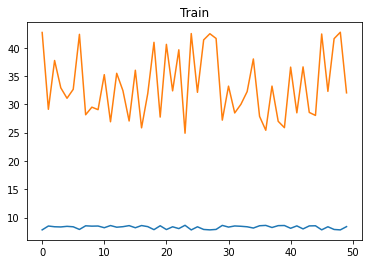

2/2 [==============================] - 1s 6ms/step


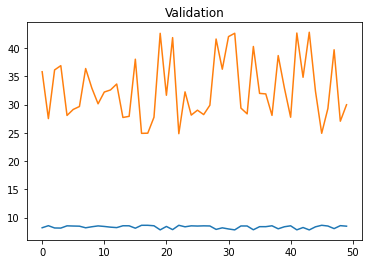

3/3 [==============================] - 0s 7ms/step


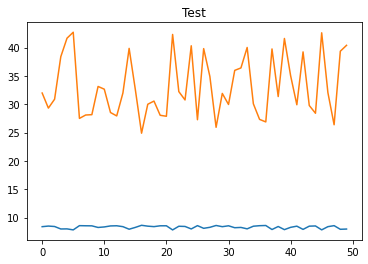

3/3 [==============================] - 0s 4ms/step


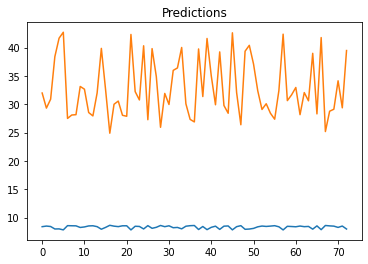

In [6]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1152.0481 - root_mean_squared_error: 33.9418 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 648ms/step - loss: 1148.2692 - root_mean_squared_error: 33.8861 - val_loss: 1205.1060 - val_root_mean_squared_error: 34.7146
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 1147.5790 - root_mean_squared_error: 33.8759INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 798ms/step - loss: 1137.8110 - root_mean_squared_error: 33.7315 - val_loss: 1194.3541 - val_root_mean_squared_error: 34.5594
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 1126.0895 - root_mean_squared_error: 33.5573INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 529ms/step - loss: 1127.2097 - root_mean_squared_error: 33.5739 - val_loss: 1183.5094 - val_root_mean_squared_error: 34.4022
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 1094.6256 - root_mean_squared_error: 33.0851INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 667ms/step - loss: 1116.5735 - root_mean_squared_error: 33.4152 - val_loss: 1172.5159 - val_root_mean_squared_error: 34.2420
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 1105.7766 - root_mean_squared_error: 33.2532INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 716ms/step - loss: 1105.7766 - root_mean_squared_error: 33.2532 - val_loss: 1161.3833 - val_root_mean_squared_error: 34.0791
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 1226.1720 - root_mean_squared_error: 35.0167INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 640ms/step - loss: 1094.8661 - root_mean_squared_error: 33.0888 - val_loss: 1150.1313 - val_root_mean_squared_error: 33.9136
Epoch 7/50
4/8 [==============>...............] - ETA: 0s - loss: 1141.3906 - root_mean_squared_error: 33.7845INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 724ms/step - loss: 1083.8121 - root_mean_squared_error: 32.9213 - val_loss: 1138.7234 - val_root_mean_squared_error: 33.7450
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 1078.8357 - root_mean_squared_error: 32.8456INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 675ms/step - loss: 1072.6129 - root_mean_squared_error: 32.7508 - val_loss: 1127.2380 - val_root_mean_squared_error: 33.5744
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 1064.9629 - root_mean_squared_error: 32.6338INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 690ms/step - loss: 1061.3685 - root_mean_squared_error: 32.5787 - val_loss: 1115.7494 - val_root_mean_squared_error: 33.4028
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 990.1851 - root_mean_squared_error: 31.4672INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 710ms/step - loss: 1050.1514 - root_mean_squared_error: 32.4060 - val_loss: 1104.3044 - val_root_mean_squared_error: 33.2311
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 1106.7844 - root_mean_squared_error: 33.2684INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 663ms/step - loss: 1039.0868 - root_mean_squared_error: 32.2349 - val_loss: 1093.0048 - val_root_mean_squared_error: 33.0606
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 1028.1473 - root_mean_squared_error: 32.0647INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 615ms/step - loss: 1028.1473 - root_mean_squared_error: 32.0647 - val_loss: 1082.0107 - val_root_mean_squared_error: 32.8939
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 1034.7485 - root_mean_squared_error: 32.1675INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 741ms/step - loss: 1017.5212 - root_mean_squared_error: 31.8986 - val_loss: 1071.2397 - val_root_mean_squared_error: 32.7298
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 963.2716 - root_mean_squared_error: 31.0366INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 674ms/step - loss: 1007.0626 - root_mean_squared_error: 31.7342 - val_loss: 1060.6949 - val_root_mean_squared_error: 32.5683
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 1022.8557 - root_mean_squared_error: 31.9821INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 723ms/step - loss: 996.7939 - root_mean_squared_error: 31.5720 - val_loss: 1050.2562 - val_root_mean_squared_error: 32.4077
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 977.0557 - root_mean_squared_error: 31.2579INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 658ms/step - loss: 986.5512 - root_mean_squared_error: 31.4094 - val_loss: 1039.8280 - val_root_mean_squared_error: 32.2464
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 976.3211 - root_mean_squared_error: 31.2461INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 677ms/step - loss: 976.3211 - root_mean_squared_error: 31.2461 - val_loss: 1029.3837 - val_root_mean_squared_error: 32.0840
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 965.4212 - root_mean_squared_error: 31.0712INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 637ms/step - loss: 966.0486 - root_mean_squared_error: 31.0813 - val_loss: 1018.8778 - val_root_mean_squared_error: 31.9199
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 955.8130 - root_mean_squared_error: 30.9162INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 695ms/step - loss: 955.8130 - root_mean_squared_error: 30.9162 - val_loss: 1008.3608 - val_root_mean_squared_error: 31.7547
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 899.7021 - root_mean_squared_error: 29.9950INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 638ms/step - loss: 945.5742 - root_mean_squared_error: 30.7502 - val_loss: 997.9011 - val_root_mean_squared_error: 31.5896
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 935.4401 - root_mean_squared_error: 30.5850INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 777ms/step - loss: 935.4401 - root_mean_squared_error: 30.5850 - val_loss: 987.6577 - val_root_mean_squared_error: 31.4270
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 934.8984 - root_mean_squared_error: 30.5761INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 596ms/step - loss: 925.5912 - root_mean_squared_error: 30.4235 - val_loss: 977.6936 - val_root_mean_squared_error: 31.2681
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 917.7061 - root_mean_squared_error: 30.2937INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 648ms/step - loss: 916.0627 - root_mean_squared_error: 30.2665 - val_loss: 968.1229 - val_root_mean_squared_error: 31.1147
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 906.9346 - root_mean_squared_error: 30.1154INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 700ms/step - loss: 906.9346 - root_mean_squared_error: 30.1154 - val_loss: 958.9881 - val_root_mean_squared_error: 30.9675
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 895.5565 - root_mean_squared_error: 29.9258INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 804ms/step - loss: 898.1538 - root_mean_squared_error: 29.9692 - val_loss: 950.1730 - val_root_mean_squared_error: 30.8249
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 889.5825 - root_mean_squared_error: 29.8259INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 749ms/step - loss: 889.5825 - root_mean_squared_error: 29.8259 - val_loss: 941.5042 - val_root_mean_squared_error: 30.6839
Epoch 27/50
4/8 [==============>...............] - ETA: 0s - loss: 915.7550 - root_mean_squared_error: 30.2614INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 621ms/step - loss: 880.9823 - root_mean_squared_error: 29.6813 - val_loss: 932.7415 - val_root_mean_squared_error: 30.5408
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 872.0974 - root_mean_squared_error: 29.5313INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 670ms/step - loss: 872.0974 - root_mean_squared_error: 29.5313 - val_loss: 923.6467 - val_root_mean_squared_error: 30.3916
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 852.1719 - root_mean_squared_error: 29.1920INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 684ms/step - loss: 862.7016 - root_mean_squared_error: 29.3718 - val_loss: 913.9318 - val_root_mean_squared_error: 30.2313
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 883.7594 - root_mean_squared_error: 29.7281INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 694ms/step - loss: 852.5636 - root_mean_squared_error: 29.1987 - val_loss: 903.3751 - val_root_mean_squared_error: 30.0562
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 906.0698 - root_mean_squared_error: 30.1010INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 512ms/step - loss: 841.4426 - root_mean_squared_error: 29.0076 - val_loss: 891.8082 - val_root_mean_squared_error: 29.8632
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 857.1476 - root_mean_squared_error: 29.2771INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 458ms/step - loss: 829.2296 - root_mean_squared_error: 28.7963 - val_loss: 879.1625 - val_root_mean_squared_error: 29.6507
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 826.5636 - root_mean_squared_error: 28.7500INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 549ms/step - loss: 816.0213 - root_mean_squared_error: 28.5661 - val_loss: 865.4561 - val_root_mean_squared_error: 29.4186
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 767.6251 - root_mean_squared_error: 27.7060INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 573ms/step - loss: 801.9106 - root_mean_squared_error: 28.3180 - val_loss: 850.8720 - val_root_mean_squared_error: 29.1697
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 693.9169 - root_mean_squared_error: 26.3423INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 436ms/step - loss: 787.0890 - root_mean_squared_error: 28.0551 - val_loss: 835.6183 - val_root_mean_squared_error: 28.9071
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 689.3336 - root_mean_squared_error: 26.2552INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 435ms/step - loss: 771.8111 - root_mean_squared_error: 27.7815 - val_loss: 820.0515 - val_root_mean_squared_error: 28.6365
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 787.9229 - root_mean_squared_error: 28.0700INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 571ms/step - loss: 756.5444 - root_mean_squared_error: 27.5054 - val_loss: 804.2942 - val_root_mean_squared_error: 28.3601
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 641.7365 - root_mean_squared_error: 25.3325INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 609ms/step - loss: 741.2781 - root_mean_squared_error: 27.2264 - val_loss: 788.7428 - val_root_mean_squared_error: 28.0846
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 712.4645 - root_mean_squared_error: 26.6920INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 527ms/step - loss: 726.1673 - root_mean_squared_error: 26.9475 - val_loss: 773.3818 - val_root_mean_squared_error: 27.8097
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 680.4127 - root_mean_squared_error: 26.0847INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 532ms/step - loss: 711.6987 - root_mean_squared_error: 26.6777 - val_loss: 758.5418 - val_root_mean_squared_error: 27.5416
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 610.2433 - root_mean_squared_error: 24.7031INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 591ms/step - loss: 697.7399 - root_mean_squared_error: 26.4148 - val_loss: 744.2983 - val_root_mean_squared_error: 27.2818
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 601.5613 - root_mean_squared_error: 24.5267INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 676ms/step - loss: 684.3587 - root_mean_squared_error: 26.1602 - val_loss: 730.5959 - val_root_mean_squared_error: 27.0295
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 675.4833 - root_mean_squared_error: 25.9901INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 824ms/step - loss: 671.6499 - root_mean_squared_error: 25.9162 - val_loss: 717.3455 - val_root_mean_squared_error: 26.7833
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 612.7369 - root_mean_squared_error: 24.7535INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 635ms/step - loss: 659.2395 - root_mean_squared_error: 25.6757 - val_loss: 704.5899 - val_root_mean_squared_error: 26.5441
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 658.6757 - root_mean_squared_error: 25.6647INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 577ms/step - loss: 647.2644 - root_mean_squared_error: 25.4414 - val_loss: 692.1771 - val_root_mean_squared_error: 26.3093
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 669.7363 - root_mean_squared_error: 25.8793INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 652ms/step - loss: 635.5308 - root_mean_squared_error: 25.2097 - val_loss: 680.0243 - val_root_mean_squared_error: 26.0773
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 598.4433 - root_mean_squared_error: 24.4631INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 755ms/step - loss: 624.0561 - root_mean_squared_error: 24.9811 - val_loss: 668.3654 - val_root_mean_squared_error: 25.8528
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 552.0815 - root_mean_squared_error: 23.4964INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 694ms/step - loss: 613.1658 - root_mean_squared_error: 24.7622 - val_loss: 657.2307 - val_root_mean_squared_error: 25.6365
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 566.4088 - root_mean_squared_error: 23.7993INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 566ms/step - loss: 602.9926 - root_mean_squared_error: 24.5559 - val_loss: 646.8588 - val_root_mean_squared_error: 25.4334
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 494.6948 - root_mean_squared_error: 22.2417INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 0s 4ms/step


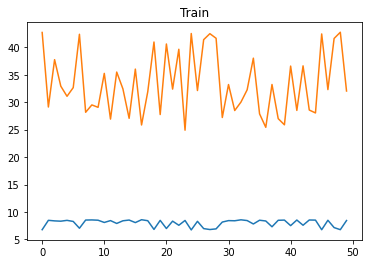

2/2 [==============================] - 1s 4ms/step


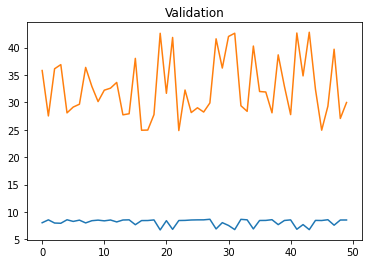

3/3 [==============================] - 0s 4ms/step


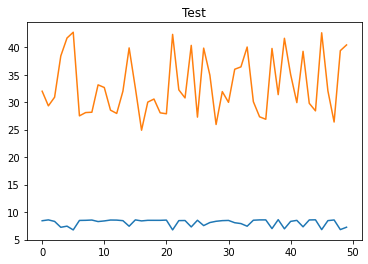

3/3 [==============================] - 0s 4ms/step


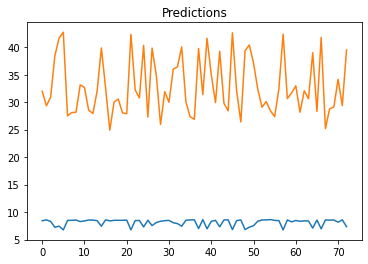

In [7]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1370.5780 - root_mean_squared_error: 37.0213

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 338ms/step - loss: 1370.5780 - root_mean_squared_error: 37.0213 - val_loss: 1417.1780 - val_root_mean_squared_error: 37.6454
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 1339.0394 - root_mean_squared_error: 36.5929

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 264ms/step - loss: 1307.2465 - root_mean_squared_error: 36.1559 - val_loss: 1361.0127 - val_root_mean_squared_error: 36.8919
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1266.7472 - root_mean_squared_error: 35.5914

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 289ms/step - loss: 1266.7472 - root_mean_squared_error: 35.5914 - val_loss: 1326.5027 - val_root_mean_squared_error: 36.4212
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 1239.6198 - root_mean_squared_error: 35.2082

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 301ms/step - loss: 1234.7087 - root_mean_squared_error: 35.1384 - val_loss: 1292.4812 - val_root_mean_squared_error: 35.9511
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 1188.1001 - root_mean_squared_error: 34.4688

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 247ms/step - loss: 1203.4174 - root_mean_squared_error: 34.6903 - val_loss: 1259.0531 - val_root_mean_squared_error: 35.4831
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 1189.9751 - root_mean_squared_error: 34.4960

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 423ms/step - loss: 1172.5752 - root_mean_squared_error: 34.2429 - val_loss: 1226.1188 - val_root_mean_squared_error: 35.0160
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 1085.0754 - root_mean_squared_error: 32.9405

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 221ms/step - loss: 1142.3677 - root_mean_squared_error: 33.7989 - val_loss: 1193.9795 - val_root_mean_squared_error: 34.5540
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 993.7115 - root_mean_squared_error: 31.5232

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 252ms/step - loss: 1112.7463 - root_mean_squared_error: 33.3579 - val_loss: 1164.6761 - val_root_mean_squared_error: 34.1274
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 1182.9329 - root_mean_squared_error: 34.3938

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 257ms/step - loss: 1088.7115 - root_mean_squared_error: 32.9956 - val_loss: 1141.3715 - val_root_mean_squared_error: 33.7842
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 1079.7668 - root_mean_squared_error: 32.8598

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 296ms/step - loss: 1067.0710 - root_mean_squared_error: 32.6661 - val_loss: 1118.2047 - val_root_mean_squared_error: 33.4396
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 1043.9045 - root_mean_squared_error: 32.3095

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 212ms/step - loss: 1045.7031 - root_mean_squared_error: 32.3373 - val_loss: 1098.3568 - val_root_mean_squared_error: 33.1415
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 1042.2700 - root_mean_squared_error: 32.2842

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 203ms/step - loss: 1035.8337 - root_mean_squared_error: 32.1844 - val_loss: 1097.9532 - val_root_mean_squared_error: 33.1354
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 1037.0867 - root_mean_squared_error: 32.2038

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 236ms/step - loss: 1035.7532 - root_mean_squared_error: 32.1831 - val_loss: 1097.8480 - val_root_mean_squared_error: 33.1338
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 1091.5370 - root_mean_squared_error: 33.0384

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 222ms/step - loss: 1035.6820 - root_mean_squared_error: 32.1820 - val_loss: 1097.7711 - val_root_mean_squared_error: 33.1326
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 1079.0291 - root_mean_squared_error: 32.8486

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 299ms/step - loss: 1035.6268 - root_mean_squared_error: 32.1812 - val_loss: 1097.7124 - val_root_mean_squared_error: 33.1317
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 980.9182 - root_mean_squared_error: 31.3196

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 333ms/step - loss: 1035.5763 - root_mean_squared_error: 32.1804 - val_loss: 1097.6586 - val_root_mean_squared_error: 33.1309
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 1085.6431 - root_mean_squared_error: 32.9491

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 234ms/step - loss: 1035.5280 - root_mean_squared_error: 32.1796 - val_loss: 1097.6064 - val_root_mean_squared_error: 33.1301
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 1046.1821 - root_mean_squared_error: 32.3447

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 239ms/step - loss: 1035.4790 - root_mean_squared_error: 32.1789 - val_loss: 1097.5554 - val_root_mean_squared_error: 33.1294
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 1000.6580 - root_mean_squared_error: 31.6332

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 258ms/step - loss: 1035.4298 - root_mean_squared_error: 32.1781 - val_loss: 1097.5044 - val_root_mean_squared_error: 33.1286
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 1109.0985 - root_mean_squared_error: 33.3031

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 305ms/step - loss: 1035.3809 - root_mean_squared_error: 32.1773 - val_loss: 1097.4536 - val_root_mean_squared_error: 33.1278
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 1032.7123 - root_mean_squared_error: 32.1358

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 272ms/step - loss: 1035.3317 - root_mean_squared_error: 32.1766 - val_loss: 1097.4032 - val_root_mean_squared_error: 33.1271
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 1049.5164 - root_mean_squared_error: 32.3962

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 301ms/step - loss: 1035.2825 - root_mean_squared_error: 32.1758 - val_loss: 1097.3527 - val_root_mean_squared_error: 33.1263
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 1027.3970 - root_mean_squared_error: 32.0530

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 276ms/step - loss: 1035.2335 - root_mean_squared_error: 32.1750 - val_loss: 1097.3018 - val_root_mean_squared_error: 33.1255
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 1051.8989 - root_mean_squared_error: 32.4330

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 324ms/step - loss: 1035.1843 - root_mean_squared_error: 32.1743 - val_loss: 1097.2515 - val_root_mean_squared_error: 33.1248
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 1045.6658 - root_mean_squared_error: 32.3368

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 246ms/step - loss: 1035.1351 - root_mean_squared_error: 32.1735 - val_loss: 1097.2010 - val_root_mean_squared_error: 33.1240
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 1042.3162 - root_mean_squared_error: 32.2849

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 275ms/step - loss: 1035.0859 - root_mean_squared_error: 32.1728 - val_loss: 1097.1503 - val_root_mean_squared_error: 33.1233
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 1027.2297 - root_mean_squared_error: 32.0504

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 255ms/step - loss: 1035.0366 - root_mean_squared_error: 32.1720 - val_loss: 1097.0994 - val_root_mean_squared_error: 33.1225
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 1132.5371 - root_mean_squared_error: 33.6532

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 266ms/step - loss: 1034.9872 - root_mean_squared_error: 32.1712 - val_loss: 1097.0485 - val_root_mean_squared_error: 33.1217
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 1018.8554 - root_mean_squared_error: 31.9195

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 277ms/step - loss: 1034.9377 - root_mean_squared_error: 32.1704 - val_loss: 1096.9974 - val_root_mean_squared_error: 33.1210
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 1034.8882 - root_mean_squared_error: 32.1697

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 222ms/step - loss: 1034.8882 - root_mean_squared_error: 32.1697 - val_loss: 1096.9464 - val_root_mean_squared_error: 33.1202
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 1004.3907 - root_mean_squared_error: 31.6921

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 221ms/step - loss: 1034.8384 - root_mean_squared_error: 32.1689 - val_loss: 1096.8954 - val_root_mean_squared_error: 33.1194
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 1038.6510 - root_mean_squared_error: 32.2281

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 253ms/step - loss: 1034.7887 - root_mean_squared_error: 32.1681 - val_loss: 1096.8440 - val_root_mean_squared_error: 33.1186
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 1036.8875 - root_mean_squared_error: 32.2007

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 520ms/step - loss: 1034.7389 - root_mean_squared_error: 32.1674 - val_loss: 1096.7926 - val_root_mean_squared_error: 33.1179
Epoch 34/50
4/8 [==============>...............] - ETA: 0s - loss: 1040.2123 - root_mean_squared_error: 32.2523

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 423ms/step - loss: 1034.6888 - root_mean_squared_error: 32.1666 - val_loss: 1096.7410 - val_root_mean_squared_error: 33.1171
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 989.1614 - root_mean_squared_error: 31.4509

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 289ms/step - loss: 1034.6389 - root_mean_squared_error: 32.1658 - val_loss: 1096.6897 - val_root_mean_squared_error: 33.1163
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 1067.8622 - root_mean_squared_error: 32.6782

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 221ms/step - loss: 1034.5892 - root_mean_squared_error: 32.1650 - val_loss: 1096.6382 - val_root_mean_squared_error: 33.1155
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 1059.9769 - root_mean_squared_error: 32.5573

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 226ms/step - loss: 1034.5393 - root_mean_squared_error: 32.1643 - val_loss: 1096.5870 - val_root_mean_squared_error: 33.1148
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 1058.4003 - root_mean_squared_error: 32.5331

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 297ms/step - loss: 1034.4895 - root_mean_squared_error: 32.1635 - val_loss: 1096.5361 - val_root_mean_squared_error: 33.1140
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 992.9703 - root_mean_squared_error: 31.5114

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 266ms/step - loss: 1034.4401 - root_mean_squared_error: 32.1627 - val_loss: 1096.4852 - val_root_mean_squared_error: 33.1132
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 989.4355 - root_mean_squared_error: 31.4553

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 220ms/step - loss: 1034.3907 - root_mean_squared_error: 32.1619 - val_loss: 1096.4340 - val_root_mean_squared_error: 33.1124
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 1014.7680 - root_mean_squared_error: 31.8554

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 295ms/step - loss: 1034.3408 - root_mean_squared_error: 32.1612 - val_loss: 1096.3829 - val_root_mean_squared_error: 33.1117
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 1047.9377 - root_mean_squared_error: 32.3719

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 338ms/step - loss: 1034.2913 - root_mean_squared_error: 32.1604 - val_loss: 1096.3317 - val_root_mean_squared_error: 33.1109
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 1123.0571 - root_mean_squared_error: 33.5120

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 256ms/step - loss: 1034.2415 - root_mean_squared_error: 32.1596 - val_loss: 1096.2802 - val_root_mean_squared_error: 33.1101
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 1072.0967 - root_mean_squared_error: 32.7429

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 203ms/step - loss: 1034.1912 - root_mean_squared_error: 32.1588 - val_loss: 1096.2286 - val_root_mean_squared_error: 33.1093
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 1068.4849 - root_mean_squared_error: 32.6877

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 189ms/step - loss: 1034.1410 - root_mean_squared_error: 32.1581 - val_loss: 1096.1766 - val_root_mean_squared_error: 33.1086
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 968.5278 - root_mean_squared_error: 31.1212

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 237ms/step - loss: 1034.0907 - root_mean_squared_error: 32.1573 - val_loss: 1096.1255 - val_root_mean_squared_error: 33.1078
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 1032.0178 - root_mean_squared_error: 32.1250

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 284ms/step - loss: 1034.0408 - root_mean_squared_error: 32.1565 - val_loss: 1096.0741 - val_root_mean_squared_error: 33.1070
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 939.8737 - root_mean_squared_error: 30.6574

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 292ms/step - loss: 1033.9908 - root_mean_squared_error: 32.1557 - val_loss: 1096.0227 - val_root_mean_squared_error: 33.1062
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 1083.9980 - root_mean_squared_error: 32.9241

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 301ms/step - loss: 1033.9410 - root_mean_squared_error: 32.1550 - val_loss: 1095.9714 - val_root_mean_squared_error: 33.1055
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 1048.1584 - root_mean_squared_error: 32.3753

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 0s 3ms/step


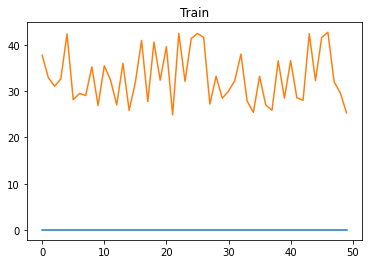

2/2 [==============================] - 0s 5ms/step


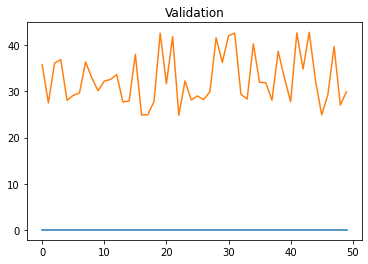

3/3 [==============================] - 0s 5ms/step


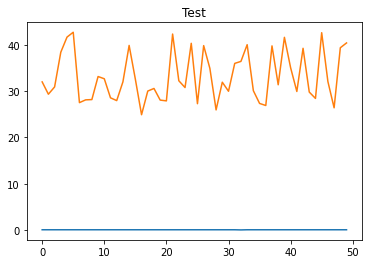

3/3 [==============================] - 0s 4ms/step


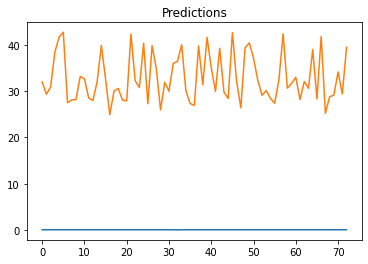

In [9]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1095.8207 - root_mean_squared_error: 33.1032 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 1s/step - loss: 1095.8207 - root_mean_squared_error: 33.1032 - val_loss: 1155.7346 - val_root_mean_squared_error: 33.9961
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 1083.4603 - root_mean_squared_error: 32.9160

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 1089.6090 - root_mean_squared_error: 33.0092 - val_loss: 1149.4426 - val_root_mean_squared_error: 33.9034
Epoch 3/50
4/8 [==============>...............] - ETA: 0s - loss: 1114.2604 - root_mean_squared_error: 33.3805

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 1083.4648 - root_mean_squared_error: 32.9160 - val_loss: 1143.1598 - val_root_mean_squared_error: 33.8106
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 1072.9093 - root_mean_squared_error: 32.7553

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 1077.2739 - root_mean_squared_error: 32.8218 - val_loss: 1136.8774 - val_root_mean_squared_error: 33.7176
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 1071.0897 - root_mean_squared_error: 32.7275

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1071.0897 - root_mean_squared_error: 32.7275 - val_loss: 1130.5829 - val_root_mean_squared_error: 33.6241
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 1076.4022 - root_mean_squared_error: 32.8086

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 1064.9353 - root_mean_squared_error: 32.6333 - val_loss: 1124.2651 - val_root_mean_squared_error: 33.5301
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 1058.5817 - root_mean_squared_error: 32.5359

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 1058.7246 - root_mean_squared_error: 32.5380 - val_loss: 1117.9309 - val_root_mean_squared_error: 33.4355
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 1049.1353 - root_mean_squared_error: 32.3904

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 1052.4615 - root_mean_squared_error: 32.4417 - val_loss: 1111.5026 - val_root_mean_squared_error: 33.3392
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 1043.5870 - root_mean_squared_error: 32.3046

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1046.0962 - root_mean_squared_error: 32.3434 - val_loss: 1104.9478 - val_root_mean_squared_error: 33.2408
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 1036.4049 - root_mean_squared_error: 32.1932

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 1s/step - loss: 1039.6212 - root_mean_squared_error: 32.2432 - val_loss: 1098.2649 - val_root_mean_squared_error: 33.1401
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 1038.5760 - root_mean_squared_error: 32.2269

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1033.0051 - root_mean_squared_error: 32.1404 - val_loss: 1091.4443 - val_root_mean_squared_error: 33.0370
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 947.7882 - root_mean_squared_error: 30.7862

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1026.2421 - root_mean_squared_error: 32.0350 - val_loss: 1084.5322 - val_root_mean_squared_error: 32.9322
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 1055.9463 - root_mean_squared_error: 32.4953

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1019.3798 - root_mean_squared_error: 31.9277 - val_loss: 1077.3734 - val_root_mean_squared_error: 32.8234
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 1007.6046 - root_mean_squared_error: 31.7428

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1012.2623 - root_mean_squared_error: 31.8161 - val_loss: 1070.0505 - val_root_mean_squared_error: 32.7116
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 1052.9966 - root_mean_squared_error: 32.4499

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1004.9594 - root_mean_squared_error: 31.7011 - val_loss: 1062.5321 - val_root_mean_squared_error: 32.5965
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 1052.6052 - root_mean_squared_error: 32.4439

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 997.4774 - root_mean_squared_error: 31.5829 - val_loss: 1054.8193 - val_root_mean_squared_error: 32.4780
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 989.7532 - root_mean_squared_error: 31.4603

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 989.7532 - root_mean_squared_error: 31.4603 - val_loss: 1046.9012 - val_root_mean_squared_error: 32.3559
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 986.1146 - root_mean_squared_error: 31.4025 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 981.8833 - root_mean_squared_error: 31.3350 - val_loss: 1038.6782 - val_root_mean_squared_error: 32.2285
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 973.6682 - root_mean_squared_error: 31.2037 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 1s/step - loss: 973.6682 - root_mean_squared_error: 31.2037 - val_loss: 1030.2487 - val_root_mean_squared_error: 32.0975
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 908.6345 - root_mean_squared_error: 30.1436

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 965.2008 - root_mean_squared_error: 31.0677 - val_loss: 1021.5157 - val_root_mean_squared_error: 31.9612
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 943.2001 - root_mean_squared_error: 30.7116

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 956.4237 - root_mean_squared_error: 30.9261 - val_loss: 1012.5310 - val_root_mean_squared_error: 31.8203
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 947.4218 - root_mean_squared_error: 30.7802

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 947.4218 - root_mean_squared_error: 30.7802 - val_loss: 1003.2977 - val_root_mean_squared_error: 31.6749
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 948.2111 - root_mean_squared_error: 30.7930

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 938.1604 - root_mean_squared_error: 30.6294 - val_loss: 993.8043 - val_root_mean_squared_error: 31.5247
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 928.7164 - root_mean_squared_error: 30.4748 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 928.7164 - root_mean_squared_error: 30.4748 - val_loss: 984.0278 - val_root_mean_squared_error: 31.3692
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 926.4294 - root_mean_squared_error: 30.4373

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 918.8865 - root_mean_squared_error: 30.3131 - val_loss: 974.0435 - val_root_mean_squared_error: 31.2097
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 926.4967 - root_mean_squared_error: 30.4384

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 908.9182 - root_mean_squared_error: 30.1483 - val_loss: 963.8295 - val_root_mean_squared_error: 31.0456
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 898.7814 - root_mean_squared_error: 29.9797

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 898.7814 - root_mean_squared_error: 29.9797 - val_loss: 953.4885 - val_root_mean_squared_error: 30.8786
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 922.0597 - root_mean_squared_error: 30.3654

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 888.5065 - root_mean_squared_error: 29.8078 - val_loss: 943.1033 - val_root_mean_squared_error: 30.7100
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 892.4464 - root_mean_squared_error: 29.8738

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 878.2149 - root_mean_squared_error: 29.6347 - val_loss: 932.6456 - val_root_mean_squared_error: 30.5392
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 867.8641 - root_mean_squared_error: 29.4595

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 867.8641 - root_mean_squared_error: 29.4595 - val_loss: 922.0824 - val_root_mean_squared_error: 30.3658
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 853.8533 - root_mean_squared_error: 29.2208

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 857.4106 - root_mean_squared_error: 29.2816 - val_loss: 911.4416 - val_root_mean_squared_error: 30.1901
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 859.2568 - root_mean_squared_error: 29.3131

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 846.8815 - root_mean_squared_error: 29.1012 - val_loss: 900.6912 - val_root_mean_squared_error: 30.0115
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 811.2155 - root_mean_squared_error: 28.4818

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 836.2860 - root_mean_squared_error: 28.9186 - val_loss: 889.8882 - val_root_mean_squared_error: 29.8310
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 807.0594 - root_mean_squared_error: 28.4088

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 825.5837 - root_mean_squared_error: 28.7330 - val_loss: 878.9388 - val_root_mean_squared_error: 29.6469
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 821.5846 - root_mean_squared_error: 28.6633

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 814.7979 - root_mean_squared_error: 28.5447 - val_loss: 867.9723 - val_root_mean_squared_error: 29.4614
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 800.4246 - root_mean_squared_error: 28.2918

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 804.0023 - root_mean_squared_error: 28.3549 - val_loss: 856.8938 - val_root_mean_squared_error: 29.2727
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 833.2524 - root_mean_squared_error: 28.8661

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 792.9811 - root_mean_squared_error: 28.1599 - val_loss: 845.5547 - val_root_mean_squared_error: 29.0784
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 781.6271 - root_mean_squared_error: 27.9576

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 781.6271 - root_mean_squared_error: 27.9576 - val_loss: 833.9656 - val_root_mean_squared_error: 28.8785
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 766.4333 - root_mean_squared_error: 27.6845

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 770.0389 - root_mean_squared_error: 27.7496 - val_loss: 822.1386 - val_root_mean_squared_error: 28.6730
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 761.0444 - root_mean_squared_error: 27.5870

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 758.2070 - root_mean_squared_error: 27.5356 - val_loss: 810.1855 - val_root_mean_squared_error: 28.4638
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 746.2195 - root_mean_squared_error: 27.3170

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 746.2195 - root_mean_squared_error: 27.3170 - val_loss: 798.2104 - val_root_mean_squared_error: 28.2526
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 734.2001 - root_mean_squared_error: 27.0961

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 734.2001 - root_mean_squared_error: 27.0961 - val_loss: 786.3613 - val_root_mean_squared_error: 28.0421
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 722.5461 - root_mean_squared_error: 26.8802

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 722.5461 - root_mean_squared_error: 26.8802 - val_loss: 774.5873 - val_root_mean_squared_error: 27.8314
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 688.9142 - root_mean_squared_error: 26.2472

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 7s 1s/step - loss: 711.0956 - root_mean_squared_error: 26.6664 - val_loss: 763.2629 - val_root_mean_squared_error: 27.6272
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 700.1628 - root_mean_squared_error: 26.4606

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 700.1628 - root_mean_squared_error: 26.4606 - val_loss: 752.2180 - val_root_mean_squared_error: 27.4266
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 750.2423 - root_mean_squared_error: 27.3906

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 689.6689 - root_mean_squared_error: 26.2615 - val_loss: 741.3673 - val_root_mean_squared_error: 27.2281
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 712.7484 - root_mean_squared_error: 26.6973

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 679.3913 - root_mean_squared_error: 26.0651 - val_loss: 730.9317 - val_root_mean_squared_error: 27.0357
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 688.5835 - root_mean_squared_error: 26.2409

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 669.5115 - root_mean_squared_error: 25.8749 - val_loss: 720.7462 - val_root_mean_squared_error: 26.8467
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 612.5492 - root_mean_squared_error: 24.7497

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 659.7737 - root_mean_squared_error: 25.6861 - val_loss: 710.7809 - val_root_mean_squared_error: 26.6605
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 673.3315 - root_mean_squared_error: 25.9486

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 1s 6ms/step


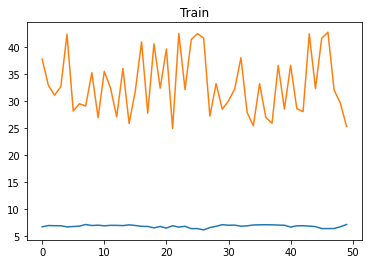

2/2 [==============================] - 1s 4ms/step


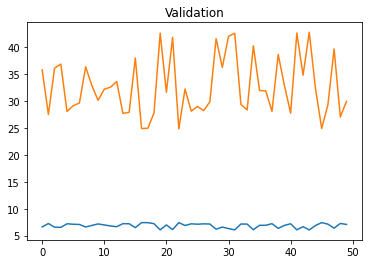

3/3 [==============================] - 0s 4ms/step


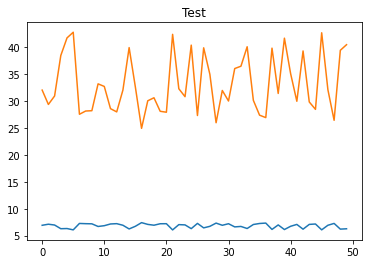

3/3 [==============================] - 0s 44ms/step


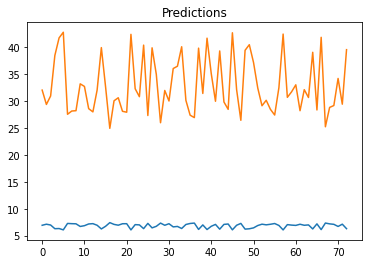

In [10]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1096.4275 - root_mean_squared_error: 33.1123

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 2s/step - loss: 1096.4275 - root_mean_squared_error: 33.1123 - val_loss: 1157.2056 - val_root_mean_squared_error: 34.0177
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 1098.7499 - root_mean_squared_error: 33.1474

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 1090.8975 - root_mean_squared_error: 33.0287 - val_loss: 1151.5841 - val_root_mean_squared_error: 33.9350
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 1068.9471 - root_mean_squared_error: 32.6948

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 1085.3577 - root_mean_squared_error: 32.9448 - val_loss: 1145.9835 - val_root_mean_squared_error: 33.8524
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 1090.7495 - root_mean_squared_error: 33.0265

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 1079.8619 - root_mean_squared_error: 32.8613 - val_loss: 1140.3702 - val_root_mean_squared_error: 33.7694
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 1077.6827 - root_mean_squared_error: 32.8281

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 1074.3245 - root_mean_squared_error: 32.7769 - val_loss: 1134.7548 - val_root_mean_squared_error: 33.6861
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 1069.4993 - root_mean_squared_error: 32.7032

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1068.7639 - root_mean_squared_error: 32.6920 - val_loss: 1129.1000 - val_root_mean_squared_error: 33.6021
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 1067.5002 - root_mean_squared_error: 32.6726

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1063.1719 - root_mean_squared_error: 32.6063 - val_loss: 1123.3639 - val_root_mean_squared_error: 33.5166
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 1062.3879 - root_mean_squared_error: 32.5943

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1057.5020 - root_mean_squared_error: 32.5193 - val_loss: 1117.6339 - val_root_mean_squared_error: 33.4310
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 1051.8625 - root_mean_squared_error: 32.4324

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1051.8625 - root_mean_squared_error: 32.4324 - val_loss: 1112.1581 - val_root_mean_squared_error: 33.3490
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 1047.7733 - root_mean_squared_error: 32.3693

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1046.4617 - root_mean_squared_error: 32.3491 - val_loss: 1107.1565 - val_root_mean_squared_error: 33.2740
Epoch 11/50
4/8 [==============>...............] - ETA: 0s - loss: 1053.5684 - root_mean_squared_error: 32.4587

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1042.4628 - root_mean_squared_error: 32.2872 - val_loss: 1103.8612 - val_root_mean_squared_error: 33.2244
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 1039.6448 - root_mean_squared_error: 32.2435

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1039.6448 - root_mean_squared_error: 32.2435 - val_loss: 1100.7472 - val_root_mean_squared_error: 33.1775
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 1098.6370 - root_mean_squared_error: 33.1457

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1036.7091 - root_mean_squared_error: 32.1980 - val_loss: 1097.6014 - val_root_mean_squared_error: 33.1301
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 1044.6696 - root_mean_squared_error: 32.3214

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1033.7118 - root_mean_squared_error: 32.1514 - val_loss: 1094.6068 - val_root_mean_squared_error: 33.0848
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 1032.1345 - root_mean_squared_error: 32.1269

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1030.7556 - root_mean_squared_error: 32.1054 - val_loss: 1091.5667 - val_root_mean_squared_error: 33.0389
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 1027.7852 - root_mean_squared_error: 32.0591

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1027.7852 - root_mean_squared_error: 32.0591 - val_loss: 1088.6082 - val_root_mean_squared_error: 32.9941
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 1025.1775 - root_mean_squared_error: 32.0184

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1025.1775 - root_mean_squared_error: 32.0184 - val_loss: 1086.7339 - val_root_mean_squared_error: 32.9656
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 1024.4230 - root_mean_squared_error: 32.0066

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1023.9698 - root_mean_squared_error: 31.9995 - val_loss: 1085.5061 - val_root_mean_squared_error: 32.9470
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 937.8290 - root_mean_squared_error: 30.6240

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1023.1902 - root_mean_squared_error: 31.9873 - val_loss: 1084.6516 - val_root_mean_squared_error: 32.9340
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 1022.4752 - root_mean_squared_error: 31.9762

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1022.4752 - root_mean_squared_error: 31.9762 - val_loss: 1083.8707 - val_root_mean_squared_error: 32.9222
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 1018.5931 - root_mean_squared_error: 31.9154

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1021.7551 - root_mean_squared_error: 31.9649 - val_loss: 1083.1167 - val_root_mean_squared_error: 32.9107
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 1045.4971 - root_mean_squared_error: 32.3341

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1021.0349 - root_mean_squared_error: 31.9536 - val_loss: 1082.3655 - val_root_mean_squared_error: 32.8993
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 1020.2971 - root_mean_squared_error: 31.9421

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1020.2971 - root_mean_squared_error: 31.9421 - val_loss: 1081.6047 - val_root_mean_squared_error: 32.8878
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 1019.5451 - root_mean_squared_error: 31.9303

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1019.5451 - root_mean_squared_error: 31.9303 - val_loss: 1080.8286 - val_root_mean_squared_error: 32.8760
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 1015.2437 - root_mean_squared_error: 31.8629

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1018.7794 - root_mean_squared_error: 31.9183 - val_loss: 1080.0327 - val_root_mean_squared_error: 32.8638
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 1051.8276 - root_mean_squared_error: 32.4319

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1017.9921 - root_mean_squared_error: 31.9060 - val_loss: 1079.2153 - val_root_mean_squared_error: 32.8514
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 1017.1857 - root_mean_squared_error: 31.8933

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1017.1857 - root_mean_squared_error: 31.8933 - val_loss: 1078.3788 - val_root_mean_squared_error: 32.8387
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 1090.0468 - root_mean_squared_error: 33.0159

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1016.3583 - root_mean_squared_error: 31.8804 - val_loss: 1077.5226 - val_root_mean_squared_error: 32.8256
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 1023.0969 - root_mean_squared_error: 31.9859

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1015.5123 - root_mean_squared_error: 31.8671 - val_loss: 1076.6434 - val_root_mean_squared_error: 32.8122
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 1014.6383 - root_mean_squared_error: 31.8534

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1014.6383 - root_mean_squared_error: 31.8534 - val_loss: 1075.7417 - val_root_mean_squared_error: 32.7985
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 960.0551 - root_mean_squared_error: 30.9848

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1013.7402 - root_mean_squared_error: 31.8393 - val_loss: 1074.8044 - val_root_mean_squared_error: 32.7842
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 1013.2593 - root_mean_squared_error: 31.8317

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1012.8103 - root_mean_squared_error: 31.8247 - val_loss: 1073.8474 - val_root_mean_squared_error: 32.7696
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 1011.8589 - root_mean_squared_error: 31.8097

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1011.8589 - root_mean_squared_error: 31.8097 - val_loss: 1072.8549 - val_root_mean_squared_error: 32.7545
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 1010.8704 - root_mean_squared_error: 31.7942

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1010.8704 - root_mean_squared_error: 31.7942 - val_loss: 1071.8258 - val_root_mean_squared_error: 32.7388
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 1014.3881 - root_mean_squared_error: 31.8495

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1009.8427 - root_mean_squared_error: 31.7780 - val_loss: 1070.7653 - val_root_mean_squared_error: 32.7225
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 925.3244 - root_mean_squared_error: 30.4191

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1008.7869 - root_mean_squared_error: 31.7614 - val_loss: 1069.6620 - val_root_mean_squared_error: 32.7057
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 979.3524 - root_mean_squared_error: 31.2946

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1007.6790 - root_mean_squared_error: 31.7440 - val_loss: 1068.5070 - val_root_mean_squared_error: 32.6880
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 1005.6716 - root_mean_squared_error: 31.7123

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1006.5259 - root_mean_squared_error: 31.7258 - val_loss: 1067.3018 - val_root_mean_squared_error: 32.6696
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 1005.3187 - root_mean_squared_error: 31.7068

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1005.3187 - root_mean_squared_error: 31.7068 - val_loss: 1066.0459 - val_root_mean_squared_error: 32.6504
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 1007.5648 - root_mean_squared_error: 31.7422

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1004.0516 - root_mean_squared_error: 31.6868 - val_loss: 1064.7180 - val_root_mean_squared_error: 32.6300
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 994.0978 - root_mean_squared_error: 31.5293

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1002.7190 - root_mean_squared_error: 31.6657 - val_loss: 1063.3256 - val_root_mean_squared_error: 32.6087
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 1001.3138 - root_mean_squared_error: 31.6435

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1001.3138 - root_mean_squared_error: 31.6435 - val_loss: 1061.8489 - val_root_mean_squared_error: 32.5860
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 998.5897 - root_mean_squared_error: 31.6005

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 999.8244 - root_mean_squared_error: 31.6200 - val_loss: 1060.3083 - val_root_mean_squared_error: 32.5624
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 968.8832 - root_mean_squared_error: 31.1269

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 998.2870 - root_mean_squared_error: 31.5957 - val_loss: 1058.6957 - val_root_mean_squared_error: 32.5376
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 996.6770 - root_mean_squared_error: 31.5702 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 996.6770 - root_mean_squared_error: 31.5702 - val_loss: 1057.0142 - val_root_mean_squared_error: 32.5118
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 1008.3062 - root_mean_squared_error: 31.7538

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 994.9915 - root_mean_squared_error: 31.5435 - val_loss: 1055.2863 - val_root_mean_squared_error: 32.4852
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 993.2620 - root_mean_squared_error: 31.5161 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 993.2620 - root_mean_squared_error: 31.5161 - val_loss: 1053.5227 - val_root_mean_squared_error: 32.4580
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 991.5029 - root_mean_squared_error: 31.4881 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 991.5029 - root_mean_squared_error: 31.4881 - val_loss: 1051.6892 - val_root_mean_squared_error: 32.4298
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 1059.7891 - root_mean_squared_error: 32.5544

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 989.6673 - root_mean_squared_error: 31.4590 - val_loss: 1049.7792 - val_root_mean_squared_error: 32.4003
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 987.7515 - root_mean_squared_error: 31.4285

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 1s 3ms/step


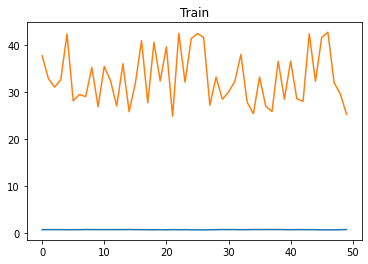

2/2 [==============================] - 1s 7ms/step


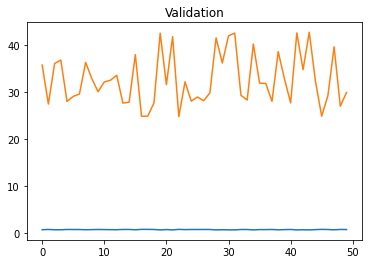

3/3 [==============================] - 0s 4ms/step


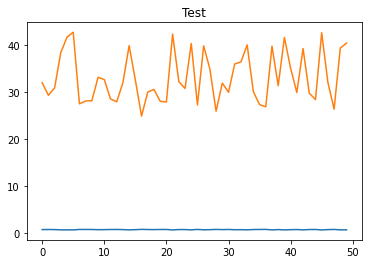

3/3 [==============================] - 0s 5ms/step


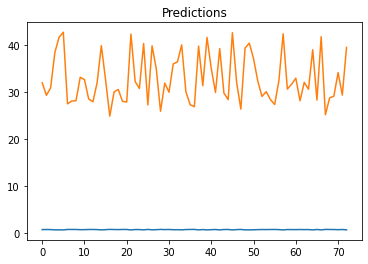

In [11]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
1/8 [==>...........................] - ETA: 21s - loss: 1122.6371 - root_mean_squared_error: 33.5058INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 939ms/step - loss: 1091.3915 - root_mean_squared_error: 33.0362 - val_loss: 1151.7408 - val_root_mean_squared_error: 33.9373
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 1107.2517 - root_mean_squared_error: 33.2754INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 686ms/step - loss: 1085.5520 - root_mean_squared_error: 32.9477 - val_loss: 1145.7568 - val_root_mean_squared_error: 33.8490
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1079.6141 - root_mean_squared_error: 32.8575INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 686ms/step - loss: 1079.6141 - root_mean_squared_error: 32.8575 - val_loss: 1139.6874 - val_root_mean_squared_error: 33.7593
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 1091.3140 - root_mean_squared_error: 33.0350INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 694ms/step - loss: 1073.5829 - root_mean_squared_error: 32.7656 - val_loss: 1133.4410 - val_root_mean_squared_error: 33.6666
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 1086.2505 - root_mean_squared_error: 32.9583INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 811ms/step - loss: 1067.3636 - root_mean_squared_error: 32.6705 - val_loss: 1126.9817 - val_root_mean_squared_error: 33.5705
Epoch 6/50
4/8 [==============>...............] - ETA: 0s - loss: 1047.5962 - root_mean_squared_error: 32.3666INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 748ms/step - loss: 1060.8678 - root_mean_squared_error: 32.5710 - val_loss: 1120.2230 - val_root_mean_squared_error: 33.4697
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 1068.5096 - root_mean_squared_error: 32.6881INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 558ms/step - loss: 1054.0890 - root_mean_squared_error: 32.4667 - val_loss: 1113.0837 - val_root_mean_squared_error: 33.3629
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 1092.1276 - root_mean_squared_error: 33.0474INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 567ms/step - loss: 1046.8918 - root_mean_squared_error: 32.3557 - val_loss: 1105.5140 - val_root_mean_squared_error: 33.2493
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 998.6501 - root_mean_squared_error: 31.6014INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 647ms/step - loss: 1039.2052 - root_mean_squared_error: 32.2367 - val_loss: 1097.4117 - val_root_mean_squared_error: 33.1272
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 964.6149 - root_mean_squared_error: 31.0583INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 3s 448ms/step - loss: 1030.9753 - root_mean_squared_error: 32.1088 - val_loss: 1088.6431 - val_root_mean_squared_error: 32.9946
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 1024.3113 - root_mean_squared_error: 32.0049INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 737ms/step - loss: 1022.0278 - root_mean_squared_error: 31.9692 - val_loss: 1079.1670 - val_root_mean_squared_error: 32.8507
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 957.3452 - root_mean_squared_error: 30.9410INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 616ms/step - loss: 1012.3331 - root_mean_squared_error: 31.8172 - val_loss: 1068.8424 - val_root_mean_squared_error: 32.6932
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 1066.0854 - root_mean_squared_error: 32.6510INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 687ms/step - loss: 1001.7531 - root_mean_squared_error: 31.6505 - val_loss: 1057.6141 - val_root_mean_squared_error: 32.5210
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 982.1334 - root_mean_squared_error: 31.3390INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 564ms/step - loss: 990.2484 - root_mean_squared_error: 31.4682 - val_loss: 1045.4443 - val_root_mean_squared_error: 32.3333
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 973.9351 - root_mean_squared_error: 31.2079INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 644ms/step - loss: 977.7551 - root_mean_squared_error: 31.2691 - val_loss: 1032.4700 - val_root_mean_squared_error: 32.1321
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 964.5280 - root_mean_squared_error: 31.0569INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 660ms/step - loss: 964.5280 - root_mean_squared_error: 31.0569 - val_loss: 1018.7102 - val_root_mean_squared_error: 31.9172
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 946.2493 - root_mean_squared_error: 30.7612 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 751ms/step - loss: 950.5817 - root_mean_squared_error: 30.8315 - val_loss: 1004.4741 - val_root_mean_squared_error: 31.6934
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 936.9562 - root_mean_squared_error: 30.6097INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 789ms/step - loss: 936.1752 - root_mean_squared_error: 30.5970 - val_loss: 989.6992 - val_root_mean_squared_error: 31.4595
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 923.1658 - root_mean_squared_error: 30.3836INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 695ms/step - loss: 921.3820 - root_mean_squared_error: 30.3543 - val_loss: 974.7382 - val_root_mean_squared_error: 31.2208
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 897.9973 - root_mean_squared_error: 29.9666INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 677ms/step - loss: 906.5660 - root_mean_squared_error: 30.1092 - val_loss: 959.7446 - val_root_mean_squared_error: 30.9797
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 891.9277 - root_mean_squared_error: 29.8652INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 581ms/step - loss: 891.9277 - root_mean_squared_error: 29.8652 - val_loss: 944.8241 - val_root_mean_squared_error: 30.7380
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 877.3797 - root_mean_squared_error: 29.6206INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 712ms/step - loss: 877.3797 - root_mean_squared_error: 29.6206 - val_loss: 930.1277 - val_root_mean_squared_error: 30.4980
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 944.6334 - root_mean_squared_error: 30.7349INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 664ms/step - loss: 863.0731 - root_mean_squared_error: 29.3781 - val_loss: 915.7819 - val_root_mean_squared_error: 30.2619
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 861.5110 - root_mean_squared_error: 29.3515INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 711ms/step - loss: 849.2276 - root_mean_squared_error: 29.1415 - val_loss: 901.7369 - val_root_mean_squared_error: 30.0289
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 835.5818 - root_mean_squared_error: 28.9064INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 640ms/step - loss: 835.5818 - root_mean_squared_error: 28.9064 - val_loss: 887.9156 - val_root_mean_squared_error: 29.7979
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 793.5522 - root_mean_squared_error: 28.1701INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 712ms/step - loss: 822.1293 - root_mean_squared_error: 28.6728 - val_loss: 874.1868 - val_root_mean_squared_error: 29.5667
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 807.9669 - root_mean_squared_error: 28.4248INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 686ms/step - loss: 808.7355 - root_mean_squared_error: 28.4383 - val_loss: 860.4620 - val_root_mean_squared_error: 29.3336
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 771.1287 - root_mean_squared_error: 27.7692INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 583ms/step - loss: 795.1823 - root_mean_squared_error: 28.1990 - val_loss: 846.5632 - val_root_mean_squared_error: 29.0958
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 855.7271 - root_mean_squared_error: 29.2528INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 618ms/step - loss: 781.3416 - root_mean_squared_error: 27.9525 - val_loss: 832.4874 - val_root_mean_squared_error: 28.8529
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 828.2618 - root_mean_squared_error: 28.7795INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 850ms/step - loss: 767.0814 - root_mean_squared_error: 27.6962 - val_loss: 818.2407 - val_root_mean_squared_error: 28.6049
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 691.6652 - root_mean_squared_error: 26.2995INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 723ms/step - loss: 752.4587 - root_mean_squared_error: 27.4310 - val_loss: 803.7896 - val_root_mean_squared_error: 28.3512
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 748.1700 - root_mean_squared_error: 27.3527INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 689ms/step - loss: 737.7341 - root_mean_squared_error: 27.1613 - val_loss: 789.0320 - val_root_mean_squared_error: 28.0897
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 606.4191 - root_mean_squared_error: 24.6256INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 709ms/step - loss: 722.6285 - root_mean_squared_error: 26.8818 - val_loss: 774.2298 - val_root_mean_squared_error: 27.8250
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 699.9601 - root_mean_squared_error: 26.4568INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 690ms/step - loss: 707.5173 - root_mean_squared_error: 26.5992 - val_loss: 759.4018 - val_root_mean_squared_error: 27.5572
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 754.6918 - root_mean_squared_error: 27.4717INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 755ms/step - loss: 692.5831 - root_mean_squared_error: 26.3170 - val_loss: 744.7885 - val_root_mean_squared_error: 27.2908
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 700.8457 - root_mean_squared_error: 26.4735INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 743ms/step - loss: 678.1880 - root_mean_squared_error: 26.0420 - val_loss: 730.7289 - val_root_mean_squared_error: 27.0320
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 620.3208 - root_mean_squared_error: 24.9062INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 629ms/step - loss: 664.7178 - root_mean_squared_error: 25.7821 - val_loss: 717.5632 - val_root_mean_squared_error: 26.7874
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 652.6349 - root_mean_squared_error: 25.5467INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 646ms/step - loss: 652.6349 - root_mean_squared_error: 25.5467 - val_loss: 705.3287 - val_root_mean_squared_error: 26.5580
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 641.5857 - root_mean_squared_error: 25.3295INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 613ms/step - loss: 641.5857 - root_mean_squared_error: 25.3295 - val_loss: 694.0170 - val_root_mean_squared_error: 26.3442
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 752.6740 - root_mean_squared_error: 27.4349INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 652ms/step - loss: 631.4376 - root_mean_squared_error: 25.1284 - val_loss: 683.4682 - val_root_mean_squared_error: 26.1432
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 698.3680 - root_mean_squared_error: 26.4267INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 617ms/step - loss: 621.6489 - root_mean_squared_error: 24.9329 - val_loss: 673.5687 - val_root_mean_squared_error: 25.9532
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 603.8947 - root_mean_squared_error: 24.5743INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 743ms/step - loss: 612.0906 - root_mean_squared_error: 24.7405 - val_loss: 664.0314 - val_root_mean_squared_error: 25.7688
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 653.7686 - root_mean_squared_error: 25.5689INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 674ms/step - loss: 602.7565 - root_mean_squared_error: 24.5511 - val_loss: 654.9830 - val_root_mean_squared_error: 25.5926
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 593.7083 - root_mean_squared_error: 24.3661INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 688ms/step - loss: 593.7083 - root_mean_squared_error: 24.3661 - val_loss: 646.5468 - val_root_mean_squared_error: 25.4273
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 584.7870 - root_mean_squared_error: 24.1824INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 647ms/step - loss: 585.3678 - root_mean_squared_error: 24.1944 - val_loss: 638.7255 - val_root_mean_squared_error: 25.2730
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 479.3737 - root_mean_squared_error: 21.8946INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 654ms/step - loss: 577.7899 - root_mean_squared_error: 24.0373 - val_loss: 631.5741 - val_root_mean_squared_error: 25.1311
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 543.4771 - root_mean_squared_error: 23.3126INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 662ms/step - loss: 571.2325 - root_mean_squared_error: 23.9005 - val_loss: 624.9354 - val_root_mean_squared_error: 24.9987
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 568.3629 - root_mean_squared_error: 23.8404INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 734ms/step - loss: 565.4080 - root_mean_squared_error: 23.7783 - val_loss: 619.0008 - val_root_mean_squared_error: 24.8797
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 596.4941 - root_mean_squared_error: 24.4232INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 641ms/step - loss: 560.3339 - root_mean_squared_error: 23.6714 - val_loss: 613.5776 - val_root_mean_squared_error: 24.7705
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 596.4778 - root_mean_squared_error: 24.4229INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 4ms/step


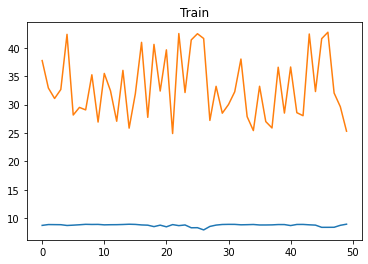

2/2 [==============================] - 0s 6ms/step


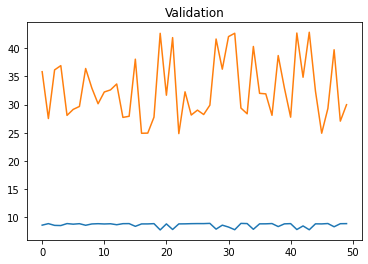

3/3 [==============================] - 0s 5ms/step


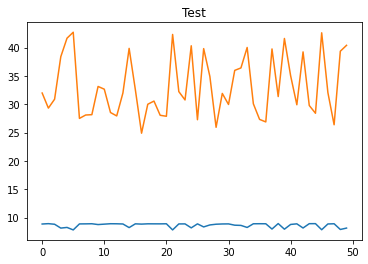

3/3 [==============================] - 0s 5ms/step


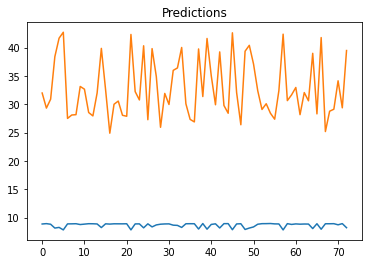

In [12]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 921.0477 - root_mean_squared_error: 30.3488 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 608ms/step - loss: 898.6161 - root_mean_squared_error: 29.9769 - val_loss: 721.2908 - val_root_mean_squared_error: 26.8569
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 718.0538 - root_mean_squared_error: 26.7965

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 449ms/step - loss: 722.1800 - root_mean_squared_error: 26.8734 - val_loss: 575.3431 - val_root_mean_squared_error: 23.9863
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 671.0917 - root_mean_squared_error: 25.9054

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 415ms/step - loss: 673.1025 - root_mean_squared_error: 25.9442 - val_loss: 486.9229 - val_root_mean_squared_error: 22.0663
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 554.9756 - root_mean_squared_error: 23.5579

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 456ms/step - loss: 530.0446 - root_mean_squared_error: 23.0227 - val_loss: 424.7949 - val_root_mean_squared_error: 20.6106
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 443.5406 - root_mean_squared_error: 21.0604

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 560ms/step - loss: 445.5518 - root_mean_squared_error: 21.1081 - val_loss: 365.6744 - val_root_mean_squared_error: 19.1226
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 376.7271 - root_mean_squared_error: 19.4095

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 423ms/step - loss: 376.0570 - root_mean_squared_error: 19.3922 - val_loss: 309.0048 - val_root_mean_squared_error: 17.5785
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 324.1576 - root_mean_squared_error: 18.0044

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 594ms/step - loss: 324.1576 - root_mean_squared_error: 18.0044 - val_loss: 255.8131 - val_root_mean_squared_error: 15.9942
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 273.4031 - root_mean_squared_error: 16.5349

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 493ms/step - loss: 262.4847 - root_mean_squared_error: 16.2014 - val_loss: 208.0804 - val_root_mean_squared_error: 14.4250
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 197.5046 - root_mean_squared_error: 14.0536

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 395ms/step - loss: 206.0250 - root_mean_squared_error: 14.3536 - val_loss: 165.2833 - val_root_mean_squared_error: 12.8563
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 184.9066 - root_mean_squared_error: 13.5980

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 479ms/step - loss: 175.2821 - root_mean_squared_error: 13.2394 - val_loss: 128.6687 - val_root_mean_squared_error: 11.3432
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 142.4044 - root_mean_squared_error: 11.9333

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 507ms/step - loss: 142.4044 - root_mean_squared_error: 11.9333 - val_loss: 97.7886 - val_root_mean_squared_error: 9.8888
Epoch 12/50
4/8 [==============>...............] - ETA: 0s - loss: 95.7323 - root_mean_squared_error: 9.7843

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 616ms/step - loss: 92.0012 - root_mean_squared_error: 9.5917 - val_loss: 72.7873 - val_root_mean_squared_error: 8.5315
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 104.6026 - root_mean_squared_error: 10.2275

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 411ms/step - loss: 101.8935 - root_mean_squared_error: 10.0942 - val_loss: 51.9917 - val_root_mean_squared_error: 7.2105
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 67.6046 - root_mean_squared_error: 8.2222

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 439ms/step - loss: 67.1920 - root_mean_squared_error: 8.1971 - val_loss: 36.2379 - val_root_mean_squared_error: 6.0198
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 57.3543 - root_mean_squared_error: 7.5733

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 498ms/step - loss: 57.8642 - root_mean_squared_error: 7.6069 - val_loss: 24.5283 - val_root_mean_squared_error: 4.9526
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 56.8327 - root_mean_squared_error: 7.5387

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 463ms/step - loss: 47.6567 - root_mean_squared_error: 6.9034 - val_loss: 15.6200 - val_root_mean_squared_error: 3.9522
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 44.6012 - root_mean_squared_error: 6.6784

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 473ms/step - loss: 44.9088 - root_mean_squared_error: 6.7014 - val_loss: 9.2461 - val_root_mean_squared_error: 3.0407
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 32.8245 - root_mean_squared_error: 5.7293

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 428ms/step - loss: 28.7095 - root_mean_squared_error: 5.3581 - val_loss: 5.4509 - val_root_mean_squared_error: 2.3347
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 32.3936 - root_mean_squared_error: 5.6915

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 396ms/step - loss: 24.4119 - root_mean_squared_error: 4.9408 - val_loss: 3.2337 - val_root_mean_squared_error: 1.7982
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 14.6061 - root_mean_squared_error: 3.8218

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 508ms/step - loss: 24.4829 - root_mean_squared_error: 4.9480 - val_loss: 2.1041 - val_root_mean_squared_error: 1.4506
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 26.7221 - root_mean_squared_error: 5.1693

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 550ms/step - loss: 26.7221 - root_mean_squared_error: 5.1693 - val_loss: 1.4335 - val_root_mean_squared_error: 1.1973
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 23.6257 - root_mean_squared_error: 4.8606

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 441ms/step - loss: 23.1748 - root_mean_squared_error: 4.8140 - val_loss: 1.0656 - val_root_mean_squared_error: 1.0323
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 24.2635 - root_mean_squared_error: 4.9258

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 428ms/step - loss: 24.2635 - root_mean_squared_error: 4.9258 - val_loss: 0.9007 - val_root_mean_squared_error: 0.9490
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 25.7130 - root_mean_squared_error: 5.0708

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 483ms/step - loss: 25.7130 - root_mean_squared_error: 5.0708 - val_loss: 0.8099 - val_root_mean_squared_error: 0.9000
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 21.2194 - root_mean_squared_error: 4.6064

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 420ms/step - loss: 21.2194 - root_mean_squared_error: 4.6064 - val_loss: 0.7538 - val_root_mean_squared_error: 0.8682
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 24.2913 - root_mean_squared_error: 4.9286

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 481ms/step - loss: 24.2913 - root_mean_squared_error: 4.9286 - val_loss: 0.7287 - val_root_mean_squared_error: 0.8536
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 20.9566 - root_mean_squared_error: 4.5778

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 526ms/step - loss: 21.2361 - root_mean_squared_error: 4.6083 - val_loss: 0.7249 - val_root_mean_squared_error: 0.8514
Epoch 28/50
8/8 [==============================] - 0s 29ms/step - loss: 23.8693 - root_mean_squared_error: 4.8856 - val_loss: 0.7308 - val_root_mean_squared_error: 0.8549
Epoch 29/50
8/8 [==============================] - 0s 24ms/step - loss: 22.1177 - root_mean_squared_error: 4.7029 - val_loss: 0.7261 - val_root_mean_squared_error: 0.8521
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 23.8046 - root_mean_squared_error: 4.8790

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 544ms/step - loss: 24.9201 - root_mean_squared_error: 4.9920 - val_loss: 0.7226 - val_root_mean_squared_error: 0.8501
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 27.8563 - root_mean_squared_error: 5.2779

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 512ms/step - loss: 27.0184 - root_mean_squared_error: 5.1979 - val_loss: 0.7179 - val_root_mean_squared_error: 0.8473
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 26.1793 - root_mean_squared_error: 5.1166

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 568ms/step - loss: 25.8185 - root_mean_squared_error: 5.0812 - val_loss: 0.7162 - val_root_mean_squared_error: 0.8463
Epoch 33/50
8/8 [==============================] - 0s 31ms/step - loss: 27.3118 - root_mean_squared_error: 5.2261 - val_loss: 0.7172 - val_root_mean_squared_error: 0.8469
Epoch 34/50
8/8 [==============================] - 0s 15ms/step - loss: 23.2544 - root_mean_squared_error: 4.8223 - val_loss: 0.7248 - val_root_mean_squared_error: 0.8513
Epoch 35/50
8/8 [==============================] - 0s 28ms/step - loss: 21.6105 - root_mean_squared_error: 4.6487 - val_loss: 0.7163 - val_root_mean_squared_error: 0.8463
Epoch 36/50
8/8 [==============================] - 0s 29ms/step - loss: 22.3368 - root_mean_squared_error: 4.7262 - val_loss: 0.7346 - val_root_mean_squared_error: 0.8571
Epoch 37/50
8/8 [==============================] - 0s 18ms/step - loss: 23.2767 - root_mean_squared_error: 4.8246 - val_loss: 0.7467 - val_root_mean_squared

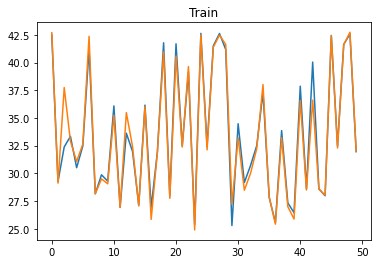

2/2 [==============================] - 0s 4ms/step


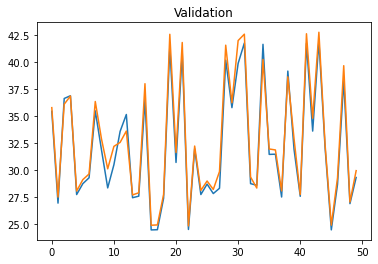

3/3 [==============================] - 0s 21ms/step


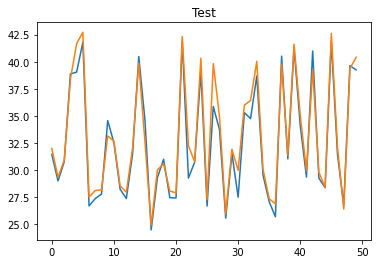

3/3 [==============================] - 0s 8ms/step


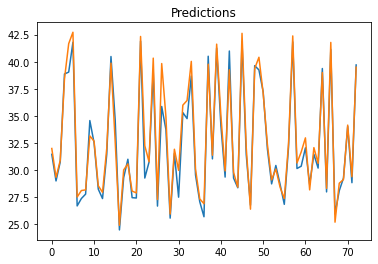

In [13]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [14]:
auto_cnn_mse

1.0226848323620394

### GRU

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 988.7443 - root_mean_squared_error: 31.4443 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 986.6602 - root_mean_squared_error: 31.4111 - val_loss: 1041.7474 - val_root_mean_squared_error: 32.2761
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 966.5130 - root_mean_squared_error: 31.0888 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 980.1494 - root_mean_squared_error: 31.3073 - val_loss: 1035.5212 - val_root_mean_squared_error: 32.1795
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 965.7051 - root_mean_squared_error: 31.0758

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 973.4912 - root_mean_squared_error: 31.2008 - val_loss: 1029.3475 - val_root_mean_squared_error: 32.0834
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 966.1793 - root_mean_squared_error: 31.0834

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 967.5201 - root_mean_squared_error: 31.1050 - val_loss: 1023.1973 - val_root_mean_squared_error: 31.9875
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 957.9617 - root_mean_squared_error: 30.9510

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 963.4543 - root_mean_squared_error: 31.0396 - val_loss: 1017.0822 - val_root_mean_squared_error: 31.8917
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 957.5887 - root_mean_squared_error: 30.9449

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 957.5887 - root_mean_squared_error: 30.9449 - val_loss: 1010.9981 - val_root_mean_squared_error: 31.7962
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 954.5805 - root_mean_squared_error: 30.8963

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 953.7321 - root_mean_squared_error: 30.8826 - val_loss: 1004.8841 - val_root_mean_squared_error: 31.6999
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 939.6630 - root_mean_squared_error: 30.6539

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 944.2217 - root_mean_squared_error: 30.7282 - val_loss: 998.6965 - val_root_mean_squared_error: 31.6022
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 840.5839 - root_mean_squared_error: 28.9928

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 939.5263 - root_mean_squared_error: 30.6517 - val_loss: 992.4578 - val_root_mean_squared_error: 31.5033
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 934.1156 - root_mean_squared_error: 30.5633

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 934.1156 - root_mean_squared_error: 30.5633 - val_loss: 986.1949 - val_root_mean_squared_error: 31.4037
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 931.7223 - root_mean_squared_error: 30.5241

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 925.5174 - root_mean_squared_error: 30.4223 - val_loss: 979.8435 - val_root_mean_squared_error: 31.3025
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 918.7833 - root_mean_squared_error: 30.3114

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 921.4545 - root_mean_squared_error: 30.3555 - val_loss: 973.3831 - val_root_mean_squared_error: 31.1991
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 917.8482 - root_mean_squared_error: 30.2960

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 911.9045 - root_mean_squared_error: 30.1978 - val_loss: 966.7893 - val_root_mean_squared_error: 31.0932
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 904.0439 - root_mean_squared_error: 30.0673

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 908.4352 - root_mean_squared_error: 30.1403 - val_loss: 960.0939 - val_root_mean_squared_error: 30.9854
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 944.0546 - root_mean_squared_error: 30.7255

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 900.4814 - root_mean_squared_error: 30.0080 - val_loss: 953.2441 - val_root_mean_squared_error: 30.8747
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 897.6581 - root_mean_squared_error: 29.9609

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 893.6396 - root_mean_squared_error: 29.8938 - val_loss: 946.1844 - val_root_mean_squared_error: 30.7601
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 861.4993 - root_mean_squared_error: 29.3513

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 886.2235 - root_mean_squared_error: 29.7695 - val_loss: 938.9813 - val_root_mean_squared_error: 30.6428
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 893.9780 - root_mean_squared_error: 29.8995

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 882.3716 - root_mean_squared_error: 29.7047 - val_loss: 931.5460 - val_root_mean_squared_error: 30.5212
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 868.6600 - root_mean_squared_error: 29.4730

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 868.6600 - root_mean_squared_error: 29.4730 - val_loss: 923.9139 - val_root_mean_squared_error: 30.3960
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 895.7310 - root_mean_squared_error: 29.9288

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 864.0648 - root_mean_squared_error: 29.3950 - val_loss: 916.1465 - val_root_mean_squared_error: 30.2679
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 857.6758 - root_mean_squared_error: 29.2861

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 857.6758 - root_mean_squared_error: 29.2861 - val_loss: 908.2126 - val_root_mean_squared_error: 30.1366
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 848.0755 - root_mean_squared_error: 29.1217

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 844.3633 - root_mean_squared_error: 29.0579 - val_loss: 900.1373 - val_root_mean_squared_error: 30.0023
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 839.2970 - root_mean_squared_error: 28.9706

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 839.2970 - root_mean_squared_error: 28.9706 - val_loss: 891.8734 - val_root_mean_squared_error: 29.8643
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 836.7142 - root_mean_squared_error: 28.9260

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 833.1398 - root_mean_squared_error: 28.8642 - val_loss: 883.5240 - val_root_mean_squared_error: 29.7241
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 814.8707 - root_mean_squared_error: 28.5459

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 826.3306 - root_mean_squared_error: 28.7460 - val_loss: 875.0479 - val_root_mean_squared_error: 29.5812
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 818.5084 - root_mean_squared_error: 28.6096

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 816.6929 - root_mean_squared_error: 28.5778 - val_loss: 866.3976 - val_root_mean_squared_error: 29.4346
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 808.4622 - root_mean_squared_error: 28.4335

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 809.3979 - root_mean_squared_error: 28.4499 - val_loss: 857.6708 - val_root_mean_squared_error: 29.2860
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 795.9520 - root_mean_squared_error: 28.2126

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 799.9313 - root_mean_squared_error: 28.2831 - val_loss: 848.8436 - val_root_mean_squared_error: 29.1349
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 782.5636 - root_mean_squared_error: 27.9743

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 792.5710 - root_mean_squared_error: 28.1526 - val_loss: 839.8812 - val_root_mean_squared_error: 28.9807
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 787.5036 - root_mean_squared_error: 28.0625

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 783.7703 - root_mean_squared_error: 27.9959 - val_loss: 830.8288 - val_root_mean_squared_error: 28.8241
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 790.2655 - root_mean_squared_error: 28.1117

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 771.7977 - root_mean_squared_error: 27.7812 - val_loss: 821.7268 - val_root_mean_squared_error: 28.6658
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 764.5867 - root_mean_squared_error: 27.6512

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 7s 952ms/step - loss: 764.5867 - root_mean_squared_error: 27.6512 - val_loss: 812.5653 - val_root_mean_squared_error: 28.5055
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 731.5746 - root_mean_squared_error: 27.0476

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 757.2258 - root_mean_squared_error: 27.5177 - val_loss: 803.4197 - val_root_mean_squared_error: 28.3447
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 746.9077 - root_mean_squared_error: 27.3296

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 746.9077 - root_mean_squared_error: 27.3296 - val_loss: 794.2216 - val_root_mean_squared_error: 28.1819
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 731.2620 - root_mean_squared_error: 27.0419

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 737.6254 - root_mean_squared_error: 27.1593 - val_loss: 785.1158 - val_root_mean_squared_error: 28.0199
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 700.5833 - root_mean_squared_error: 26.4685

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 729.4811 - root_mean_squared_error: 27.0089 - val_loss: 776.0359 - val_root_mean_squared_error: 27.8574
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 745.9398 - root_mean_squared_error: 27.3119

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 714.7054 - root_mean_squared_error: 26.7340 - val_loss: 766.9409 - val_root_mean_squared_error: 27.6937
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 708.5917 - root_mean_squared_error: 26.6194

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 710.7366 - root_mean_squared_error: 26.6596 - val_loss: 757.8700 - val_root_mean_squared_error: 27.5294
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 700.6471 - root_mean_squared_error: 26.4697

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 702.9052 - root_mean_squared_error: 26.5124 - val_loss: 748.8540 - val_root_mean_squared_error: 27.3652
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 692.2881 - root_mean_squared_error: 26.3114

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 694.7649 - root_mean_squared_error: 26.3584 - val_loss: 739.9383 - val_root_mean_squared_error: 27.2018
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 674.2655 - root_mean_squared_error: 25.9666

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 687.1459 - root_mean_squared_error: 26.2135 - val_loss: 731.1614 - val_root_mean_squared_error: 27.0400
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 671.7570 - root_mean_squared_error: 25.9183

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 677.0453 - root_mean_squared_error: 26.0201 - val_loss: 722.3892 - val_root_mean_squared_error: 26.8773
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 674.2785 - root_mean_squared_error: 25.9669

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 670.3169 - root_mean_squared_error: 25.8905 - val_loss: 713.8339 - val_root_mean_squared_error: 26.7177
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 661.4549 - root_mean_squared_error: 25.7188

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 661.4549 - root_mean_squared_error: 25.7188 - val_loss: 705.4617 - val_root_mean_squared_error: 26.5605
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 731.1108 - root_mean_squared_error: 27.0391

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 652.9459 - root_mean_squared_error: 25.5528 - val_loss: 697.2105 - val_root_mean_squared_error: 26.4047
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 735.0261 - root_mean_squared_error: 27.1114

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 643.9363 - root_mean_squared_error: 25.3759 - val_loss: 689.0989 - val_root_mean_squared_error: 26.2507
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 632.2835 - root_mean_squared_error: 25.1452

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 633.9080 - root_mean_squared_error: 25.1775 - val_loss: 681.1287 - val_root_mean_squared_error: 26.0984
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 627.4276 - root_mean_squared_error: 25.0485

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 627.4276 - root_mean_squared_error: 25.0485 - val_loss: 673.3673 - val_root_mean_squared_error: 25.9493
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 623.8174 - root_mean_squared_error: 24.9763

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 623.8174 - root_mean_squared_error: 24.9763 - val_loss: 665.7982 - val_root_mean_squared_error: 25.8031
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 510.8990 - root_mean_squared_error: 22.6031

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 1s 5ms/step


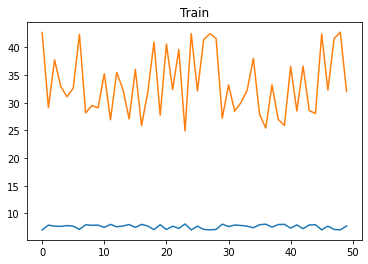

2/2 [==============================] - 1s 5ms/step


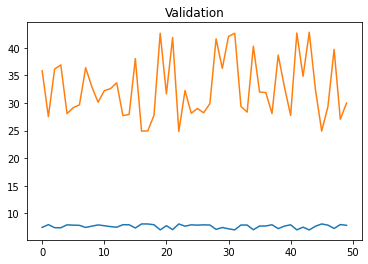

3/3 [==============================] - 0s 6ms/step


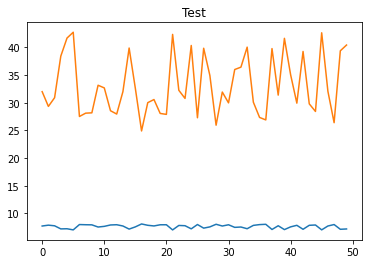

3/3 [==============================] - 0s 4ms/step


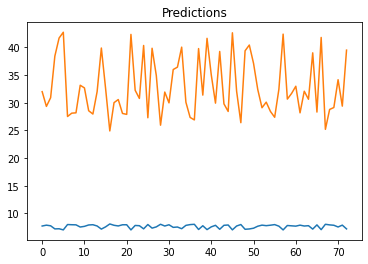

In [15]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [16]:
auto_gru_mse

662.559876128013

### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1041.4597 - root_mean_squared_error: 32.2717  

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 2s/step - loss: 1041.4597 - root_mean_squared_error: 32.2717 - val_loss: 1090.1184 - val_root_mean_squared_error: 33.0169
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 1033.5310 - root_mean_squared_error: 32.1486

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1033.4846 - root_mean_squared_error: 32.1479 - val_loss: 1084.8201 - val_root_mean_squared_error: 32.9366
Epoch 3/50
4/8 [==============>...............] - ETA: 0s - loss: 1037.4625 - root_mean_squared_error: 32.2097

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1028.9531 - root_mean_squared_error: 32.0773 - val_loss: 1079.7773 - val_root_mean_squared_error: 32.8600
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1022.4841 - root_mean_squared_error: 31.9763

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1022.4841 - root_mean_squared_error: 31.9763 - val_loss: 1074.6536 - val_root_mean_squared_error: 32.7819
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 1004.8569 - root_mean_squared_error: 31.6995

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 1020.3253 - root_mean_squared_error: 31.9425 - val_loss: 1069.4819 - val_root_mean_squared_error: 32.7029
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 1014.2579 - root_mean_squared_error: 31.8474

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1014.2579 - root_mean_squared_error: 31.8474 - val_loss: 1064.4158 - val_root_mean_squared_error: 32.6254
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 1002.7036 - root_mean_squared_error: 31.6655

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1009.4270 - root_mean_squared_error: 31.7715 - val_loss: 1059.3577 - val_root_mean_squared_error: 32.5478
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 1009.4499 - root_mean_squared_error: 31.7718

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1003.6461 - root_mean_squared_error: 31.6804 - val_loss: 1054.4066 - val_root_mean_squared_error: 32.4716
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 1005.2921 - root_mean_squared_error: 31.7063

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1001.4764 - root_mean_squared_error: 31.6461 - val_loss: 1049.5138 - val_root_mean_squared_error: 32.3962
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 999.6202 - root_mean_squared_error: 31.6168 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 999.3129 - root_mean_squared_error: 31.6119 - val_loss: 1044.6288 - val_root_mean_squared_error: 32.3207
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 999.9816 - root_mean_squared_error: 31.6225

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 991.7996 - root_mean_squared_error: 31.4928 - val_loss: 1039.7898 - val_root_mean_squared_error: 32.2458
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 976.5117 - root_mean_squared_error: 31.2492

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 986.5380 - root_mean_squared_error: 31.4092 - val_loss: 1035.1948 - val_root_mean_squared_error: 32.1744
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 975.9830 - root_mean_squared_error: 31.2407

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 979.9820 - root_mean_squared_error: 31.3047 - val_loss: 1030.6541 - val_root_mean_squared_error: 32.1038
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 981.0127 - root_mean_squared_error: 31.3211 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 977.2518 - root_mean_squared_error: 31.2610 - val_loss: 1026.0923 - val_root_mean_squared_error: 32.0327
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 972.6830 - root_mean_squared_error: 31.1879

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 972.4092 - root_mean_squared_error: 31.1835 - val_loss: 1021.4705 - val_root_mean_squared_error: 31.9604
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 991.6430 - root_mean_squared_error: 31.4904

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 969.6871 - root_mean_squared_error: 31.1398 - val_loss: 1016.7567 - val_root_mean_squared_error: 31.8866
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 969.8729 - root_mean_squared_error: 31.1428

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 961.8567 - root_mean_squared_error: 31.0138 - val_loss: 1011.9538 - val_root_mean_squared_error: 31.8112
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 959.4417 - root_mean_squared_error: 30.9749

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 957.3124 - root_mean_squared_error: 30.9405 - val_loss: 1006.9568 - val_root_mean_squared_error: 31.7326
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 952.8947 - root_mean_squared_error: 30.8690

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 952.8947 - root_mean_squared_error: 30.8690 - val_loss: 1001.7954 - val_root_mean_squared_error: 31.6512
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 965.3872 - root_mean_squared_error: 31.0707

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 947.3352 - root_mean_squared_error: 30.7788 - val_loss: 996.4062 - val_root_mean_squared_error: 31.5659
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 940.1110 - root_mean_squared_error: 30.6612

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 942.8611 - root_mean_squared_error: 30.7060 - val_loss: 990.7993 - val_root_mean_squared_error: 31.4770
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 934.9727 - root_mean_squared_error: 30.5773

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 934.1323 - root_mean_squared_error: 30.5636 - val_loss: 984.8915 - val_root_mean_squared_error: 31.3830
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 931.2299 - root_mean_squared_error: 30.5161

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 931.2299 - root_mean_squared_error: 30.5161 - val_loss: 978.7944 - val_root_mean_squared_error: 31.2857
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 924.9804 - root_mean_squared_error: 30.4135

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 924.9804 - root_mean_squared_error: 30.4135 - val_loss: 972.4741 - val_root_mean_squared_error: 31.1845
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 916.8253 - root_mean_squared_error: 30.2791

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 916.8253 - root_mean_squared_error: 30.2791 - val_loss: 965.9236 - val_root_mean_squared_error: 31.0793
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 951.5407 - root_mean_squared_error: 30.8471

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 911.9969 - root_mean_squared_error: 30.1993 - val_loss: 959.0430 - val_root_mean_squared_error: 30.9684
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 904.1401 - root_mean_squared_error: 30.0689

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 904.1401 - root_mean_squared_error: 30.0689 - val_loss: 951.9189 - val_root_mean_squared_error: 30.8532
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 889.8175 - root_mean_squared_error: 29.8298

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 894.3464 - root_mean_squared_error: 29.9056 - val_loss: 944.5155 - val_root_mean_squared_error: 30.7330
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 894.0637 - root_mean_squared_error: 29.9009

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 890.1627 - root_mean_squared_error: 29.8356 - val_loss: 936.8823 - val_root_mean_squared_error: 30.6085
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 881.2380 - root_mean_squared_error: 29.6857

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 881.2380 - root_mean_squared_error: 29.6857 - val_loss: 928.9807 - val_root_mean_squared_error: 30.4792
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 887.0546 - root_mean_squared_error: 29.7835

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 873.8954 - root_mean_squared_error: 29.5617 - val_loss: 920.8488 - val_root_mean_squared_error: 30.3455
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 862.7215 - root_mean_squared_error: 29.3721

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 862.7215 - root_mean_squared_error: 29.3721 - val_loss: 912.3277 - val_root_mean_squared_error: 30.2048
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 848.2349 - root_mean_squared_error: 29.1245

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 853.9104 - root_mean_squared_error: 29.2217 - val_loss: 903.3980 - val_root_mean_squared_error: 30.0566
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 841.1071 - root_mean_squared_error: 29.0018

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 848.7487 - root_mean_squared_error: 29.1333 - val_loss: 894.0805 - val_root_mean_squared_error: 29.9012
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 837.9608 - root_mean_squared_error: 28.9476

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 837.9608 - root_mean_squared_error: 28.9476 - val_loss: 884.3094 - val_root_mean_squared_error: 29.7373
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 828.5750 - root_mean_squared_error: 28.7850

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 828.5750 - root_mean_squared_error: 28.7850 - val_loss: 874.1769 - val_root_mean_squared_error: 29.5665
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 825.8469 - root_mean_squared_error: 28.7376

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 818.7666 - root_mean_squared_error: 28.6141 - val_loss: 863.6701 - val_root_mean_squared_error: 29.3883
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 806.2533 - root_mean_squared_error: 28.3946

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 806.2533 - root_mean_squared_error: 28.3946 - val_loss: 852.7244 - val_root_mean_squared_error: 29.2014
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 798.3887 - root_mean_squared_error: 28.2558

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 798.3887 - root_mean_squared_error: 28.2558 - val_loss: 841.4259 - val_root_mean_squared_error: 29.0073
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 789.1890 - root_mean_squared_error: 28.0925

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 781.9561 - root_mean_squared_error: 27.9635 - val_loss: 829.7067 - val_root_mean_squared_error: 28.8046
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 748.3791 - root_mean_squared_error: 27.3565

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 771.7868 - root_mean_squared_error: 27.7811 - val_loss: 817.6539 - val_root_mean_squared_error: 28.5946
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 778.5197 - root_mean_squared_error: 27.9020

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 759.2427 - root_mean_squared_error: 27.5544 - val_loss: 805.3002 - val_root_mean_squared_error: 28.3778
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 737.4720 - root_mean_squared_error: 27.1564

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 752.6031 - root_mean_squared_error: 27.4336 - val_loss: 792.7554 - val_root_mean_squared_error: 28.1559
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 736.0191 - root_mean_squared_error: 27.1297

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 734.1804 - root_mean_squared_error: 27.0958 - val_loss: 779.9321 - val_root_mean_squared_error: 27.9273
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 721.8511 - root_mean_squared_error: 26.8673

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 727.4200 - root_mean_squared_error: 26.9707 - val_loss: 766.9617 - val_root_mean_squared_error: 27.6941
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 710.4636 - root_mean_squared_error: 26.6545

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 707.9797 - root_mean_squared_error: 26.6079 - val_loss: 753.8177 - val_root_mean_squared_error: 27.4557
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 701.5826 - root_mean_squared_error: 26.4874

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 700.4100 - root_mean_squared_error: 26.4653 - val_loss: 740.8079 - val_root_mean_squared_error: 27.2178
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 579.8221 - root_mean_squared_error: 24.0795

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 684.2928 - root_mean_squared_error: 26.1590 - val_loss: 727.9711 - val_root_mean_squared_error: 26.9809
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 738.5028 - root_mean_squared_error: 27.1754

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 670.4793 - root_mean_squared_error: 25.8936 - val_loss: 715.2109 - val_root_mean_squared_error: 26.7434
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 587.7642 - root_mean_squared_error: 24.2438

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 1s 4ms/step


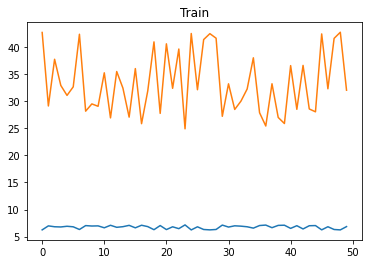

2/2 [==============================] - 1s 6ms/step


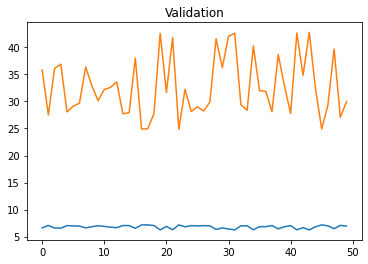

3/3 [==============================] - 0s 40ms/step


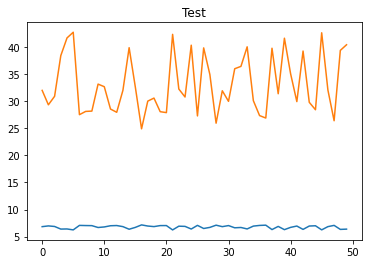

3/3 [==============================] - 0s 5ms/step


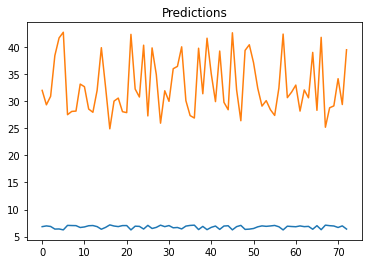

In [17]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [18]:
auto_lstm_mse

706.9436539162732

### RNN

Epoch 1/50
1/8 [==>...........................] - ETA: 27s - loss: 830.5603 - root_mean_squared_error: 28.8194INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 603ms/step - loss: 963.9987 - root_mean_squared_error: 31.0483 - val_loss: 1022.7120 - val_root_mean_squared_error: 31.9799
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 894.7938 - root_mean_squared_error: 29.9131INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 599ms/step - loss: 960.3024 - root_mean_squared_error: 30.9887 - val_loss: 1015.5902 - val_root_mean_squared_error: 31.8683
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 956.0694 - root_mean_squared_error: 30.9204INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 736ms/step - loss: 956.0694 - root_mean_squared_error: 30.9204 - val_loss: 1008.6564 - val_root_mean_squared_error: 31.7594
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 953.1227 - root_mean_squared_error: 30.8727INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 981ms/step - loss: 953.1227 - root_mean_squared_error: 30.8727 - val_loss: 1001.9465 - val_root_mean_squared_error: 31.6535
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 946.7644 - root_mean_squared_error: 30.7695 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 846ms/step - loss: 946.7644 - root_mean_squared_error: 30.7695 - val_loss: 995.4585 - val_root_mean_squared_error: 31.5509
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 939.3438 - root_mean_squared_error: 30.6487INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 831ms/step - loss: 939.3438 - root_mean_squared_error: 30.6487 - val_loss: 989.1779 - val_root_mean_squared_error: 31.4512
Epoch 7/50
3/8 [==========>...................] - ETA: 0s - loss: 938.7073 - root_mean_squared_error: 30.6383INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 766ms/step - loss: 925.0932 - root_mean_squared_error: 30.4153 - val_loss: 983.0866 - val_root_mean_squared_error: 31.3542
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 911.6345 - root_mean_squared_error: 30.1933INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 923ms/step - loss: 929.6008 - root_mean_squared_error: 30.4894 - val_loss: 977.1654 - val_root_mean_squared_error: 31.2596
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 923.9041 - root_mean_squared_error: 30.3958INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 851ms/step - loss: 921.2706 - root_mean_squared_error: 30.3524 - val_loss: 971.3497 - val_root_mean_squared_error: 31.1665
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 918.2092 - root_mean_squared_error: 30.3020INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 676ms/step - loss: 914.9800 - root_mean_squared_error: 30.2486 - val_loss: 965.5496 - val_root_mean_squared_error: 31.0733
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 905.7181 - root_mean_squared_error: 30.0952INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 935ms/step - loss: 905.7181 - root_mean_squared_error: 30.0952 - val_loss: 959.7512 - val_root_mean_squared_error: 30.9799
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 905.9908 - root_mean_squared_error: 30.0997INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 563ms/step - loss: 905.9908 - root_mean_squared_error: 30.0997 - val_loss: 954.0024 - val_root_mean_squared_error: 30.8869
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 891.4013 - root_mean_squared_error: 29.8563INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 666ms/step - loss: 896.6130 - root_mean_squared_error: 29.9435 - val_loss: 948.3248 - val_root_mean_squared_error: 30.7949
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 898.2862 - root_mean_squared_error: 29.9714 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 803ms/step - loss: 898.2862 - root_mean_squared_error: 29.9714 - val_loss: 942.6894 - val_root_mean_squared_error: 30.7032
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 883.1914 - root_mean_squared_error: 29.7185INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 818ms/step - loss: 882.1696 - root_mean_squared_error: 29.7013 - val_loss: 937.0757 - val_root_mean_squared_error: 30.6117
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 880.7317 - root_mean_squared_error: 29.6771INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 681ms/step - loss: 880.7317 - root_mean_squared_error: 29.6771 - val_loss: 931.4841 - val_root_mean_squared_error: 30.5202
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 869.7631 - root_mean_squared_error: 29.4917INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 824ms/step - loss: 872.7418 - root_mean_squared_error: 29.5422 - val_loss: 925.8471 - val_root_mean_squared_error: 30.4277
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 883.8107 - root_mean_squared_error: 29.7290INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 686ms/step - loss: 871.2807 - root_mean_squared_error: 29.5175 - val_loss: 920.3387 - val_root_mean_squared_error: 30.3371
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 898.1061 - root_mean_squared_error: 29.9684INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 887ms/step - loss: 868.5396 - root_mean_squared_error: 29.4710 - val_loss: 914.8535 - val_root_mean_squared_error: 30.2465
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 860.1160 - root_mean_squared_error: 29.3277INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 747ms/step - loss: 856.8107 - root_mean_squared_error: 29.2713 - val_loss: 909.3797 - val_root_mean_squared_error: 30.1559
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 830.9094 - root_mean_squared_error: 28.8255INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 628ms/step - loss: 851.0863 - root_mean_squared_error: 29.1734 - val_loss: 903.7916 - val_root_mean_squared_error: 30.0631
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 864.7130 - root_mean_squared_error: 29.4060INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 654ms/step - loss: 848.8823 - root_mean_squared_error: 29.1356 - val_loss: 898.0229 - val_root_mean_squared_error: 29.9670
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 841.6993 - root_mean_squared_error: 29.0121INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 637ms/step - loss: 849.0851 - root_mean_squared_error: 29.1391 - val_loss: 892.0292 - val_root_mean_squared_error: 29.8669
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 886.7982 - root_mean_squared_error: 29.7792INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 603ms/step - loss: 834.3477 - root_mean_squared_error: 28.8851 - val_loss: 885.7964 - val_root_mean_squared_error: 29.7623
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 875.5775 - root_mean_squared_error: 29.5902INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 502ms/step - loss: 828.9557 - root_mean_squared_error: 28.7916 - val_loss: 879.3365 - val_root_mean_squared_error: 29.6536
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 783.1185 - root_mean_squared_error: 27.9843INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 727ms/step - loss: 824.0580 - root_mean_squared_error: 28.7064 - val_loss: 872.4554 - val_root_mean_squared_error: 29.5374
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 906.0625 - root_mean_squared_error: 30.1009INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 686ms/step - loss: 809.7414 - root_mean_squared_error: 28.4560 - val_loss: 865.1087 - val_root_mean_squared_error: 29.4127
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 809.0226 - root_mean_squared_error: 28.4433INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 758ms/step - loss: 812.4662 - root_mean_squared_error: 28.5038 - val_loss: 857.3483 - val_root_mean_squared_error: 29.2805
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 806.6943 - root_mean_squared_error: 28.4024INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 659ms/step - loss: 801.9809 - root_mean_squared_error: 28.3193 - val_loss: 849.0392 - val_root_mean_squared_error: 29.1383
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 793.1863 - root_mean_squared_error: 28.1636INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 738ms/step - loss: 793.1863 - root_mean_squared_error: 28.1636 - val_loss: 840.1401 - val_root_mean_squared_error: 28.9852
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 737.0450 - root_mean_squared_error: 27.1486INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 750ms/step - loss: 785.6015 - root_mean_squared_error: 28.0286 - val_loss: 830.5961 - val_root_mean_squared_error: 28.8201
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 739.1606 - root_mean_squared_error: 27.1875INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 737ms/step - loss: 778.7764 - root_mean_squared_error: 27.9066 - val_loss: 820.5880 - val_root_mean_squared_error: 28.6459
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 755.6234 - root_mean_squared_error: 27.4886INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 791ms/step - loss: 761.6520 - root_mean_squared_error: 27.5980 - val_loss: 810.3835 - val_root_mean_squared_error: 28.4672
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 787.6627 - root_mean_squared_error: 28.0653INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 760ms/step - loss: 750.3006 - root_mean_squared_error: 27.3916 - val_loss: 800.1758 - val_root_mean_squared_error: 28.2874
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 786.8503 - root_mean_squared_error: 28.0509INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 805ms/step - loss: 736.3011 - root_mean_squared_error: 27.1349 - val_loss: 790.2180 - val_root_mean_squared_error: 28.1108
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 842.7025 - root_mean_squared_error: 29.0293INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 621ms/step - loss: 731.4139 - root_mean_squared_error: 27.0447 - val_loss: 780.8231 - val_root_mean_squared_error: 27.9432
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 734.0845 - root_mean_squared_error: 27.0940INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 548ms/step - loss: 724.8083 - root_mean_squared_error: 26.9223 - val_loss: 772.1304 - val_root_mean_squared_error: 27.7872
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 708.2314 - root_mean_squared_error: 26.6126INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 976ms/step - loss: 712.6302 - root_mean_squared_error: 26.6951 - val_loss: 764.1500 - val_root_mean_squared_error: 27.6433
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 668.2119 - root_mean_squared_error: 25.8498INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 778ms/step - loss: 708.5822 - root_mean_squared_error: 26.6192 - val_loss: 756.7136 - val_root_mean_squared_error: 27.5084
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 732.0817 - root_mean_squared_error: 27.0570INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 752ms/step - loss: 700.7440 - root_mean_squared_error: 26.4716 - val_loss: 749.6195 - val_root_mean_squared_error: 27.3792
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 673.2825 - root_mean_squared_error: 25.9477INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 608ms/step - loss: 695.8992 - root_mean_squared_error: 26.3799 - val_loss: 742.8351 - val_root_mean_squared_error: 27.2550
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 681.5849 - root_mean_squared_error: 26.1072INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 947ms/step - loss: 688.6288 - root_mean_squared_error: 26.2417 - val_loss: 736.1103 - val_root_mean_squared_error: 27.1314
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 683.5690 - root_mean_squared_error: 26.1452INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 774ms/step - loss: 682.2480 - root_mean_squared_error: 26.1199 - val_loss: 729.4459 - val_root_mean_squared_error: 27.0083
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 776.9111 - root_mean_squared_error: 27.8731INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 842ms/step - loss: 678.7906 - root_mean_squared_error: 26.0536 - val_loss: 722.7881 - val_root_mean_squared_error: 26.8847
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 673.0396 - root_mean_squared_error: 25.9430INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 642ms/step - loss: 672.4545 - root_mean_squared_error: 25.9317 - val_loss: 716.0333 - val_root_mean_squared_error: 26.7588
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 687.5663 - root_mean_squared_error: 26.2215INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 653ms/step - loss: 663.2696 - root_mean_squared_error: 25.7540 - val_loss: 709.1505 - val_root_mean_squared_error: 26.6299
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 664.0203 - root_mean_squared_error: 25.7686INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 804ms/step - loss: 651.3742 - root_mean_squared_error: 25.5220 - val_loss: 702.0211 - val_root_mean_squared_error: 26.4957
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 664.8016 - root_mean_squared_error: 25.7837INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 637ms/step - loss: 653.9858 - root_mean_squared_error: 25.5731 - val_loss: 694.7927 - val_root_mean_squared_error: 26.3589
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 696.9783 - root_mean_squared_error: 26.4003INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 843ms/step - loss: 644.8815 - root_mean_squared_error: 25.3945 - val_loss: 687.5754 - val_root_mean_squared_error: 26.2217
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 637.4608 - root_mean_squared_error: 25.2480INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 4ms/step


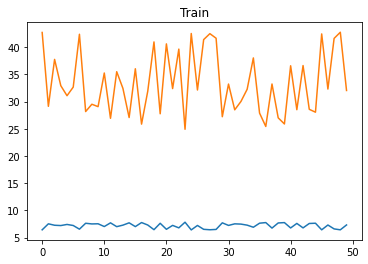

2/2 [==============================] - 0s 9ms/step


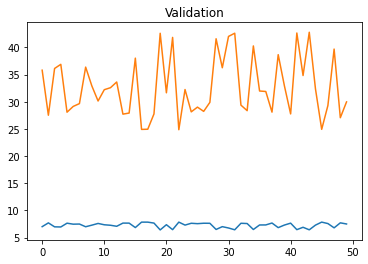

3/3 [==============================] - 0s 23ms/step


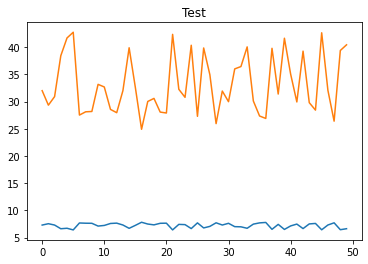

3/3 [==============================] - 0s 4ms/step


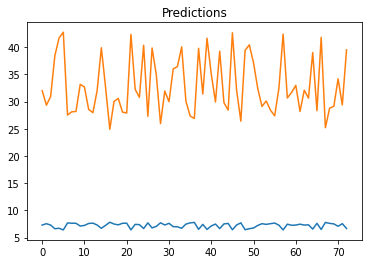

In [19]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [20]:
auto_rnn_mse

684.9710978839158

# Moving Average with Encoder

### CNN

Epoch 1/10
7/8 [=========================>....] - ETA: 0s - loss: 1291.5897 - root_mean_squared_error: 35.9387 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 435ms/step - loss: 1290.8945 - root_mean_squared_error: 35.9290 - val_loss: 1211.2772 - val_root_mean_squared_error: 34.8034
Epoch 2/10
5/8 [=================>............] - ETA: 0s - loss: 1198.6552 - root_mean_squared_error: 34.6216

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 424ms/step - loss: 1159.4753 - root_mean_squared_error: 34.0511 - val_loss: 1135.9218 - val_root_mean_squared_error: 33.7034
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 1054.6367 - root_mean_squared_error: 32.4752

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 610ms/step - loss: 1046.4473 - root_mean_squared_error: 32.3488 - val_loss: 1062.2917 - val_root_mean_squared_error: 32.5928
Epoch 4/10
1/8 [==>...........................] - ETA: 0s - loss: 970.4874 - root_mean_squared_error: 31.1526

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 328ms/step - loss: 913.1211 - root_mean_squared_error: 30.2179 - val_loss: 990.2410 - val_root_mean_squared_error: 31.4681
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 840.1917 - root_mean_squared_error: 28.9861

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 352ms/step - loss: 840.1917 - root_mean_squared_error: 28.9861 - val_loss: 834.8755 - val_root_mean_squared_error: 28.8942
Epoch 6/10
7/8 [=========================>....] - ETA: 0s - loss: 697.1181 - root_mean_squared_error: 26.4030

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 384ms/step - loss: 702.2648 - root_mean_squared_error: 26.5003 - val_loss: 655.9379 - val_root_mean_squared_error: 25.6113
Epoch 7/10
7/8 [=========================>....] - ETA: 0s - loss: 615.0504 - root_mean_squared_error: 24.8002

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 326ms/step - loss: 614.0326 - root_mean_squared_error: 24.7797 - val_loss: 490.3648 - val_root_mean_squared_error: 22.1442
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 439.6747 - root_mean_squared_error: 20.9684

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 404ms/step - loss: 441.0614 - root_mean_squared_error: 21.0015 - val_loss: 356.2900 - val_root_mean_squared_error: 18.8756
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 372.9608 - root_mean_squared_error: 19.3122

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 318ms/step - loss: 372.9608 - root_mean_squared_error: 19.3122 - val_loss: 245.3604 - val_root_mean_squared_error: 15.6640
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 325.1580 - root_mean_squared_error: 18.0321

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 0s 3ms/step


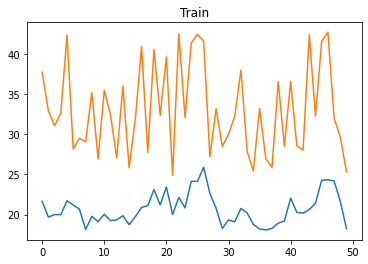

2/2 [==============================] - 0s 12ms/step


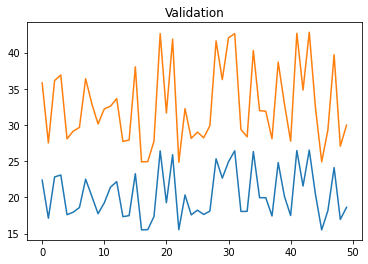

3/3 [==============================] - 0s 5ms/step


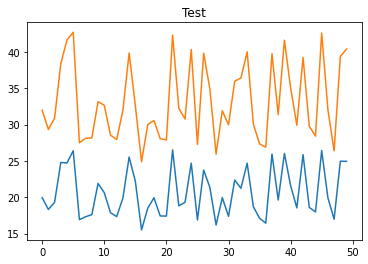

3/3 [==============================] - 0s 5ms/step


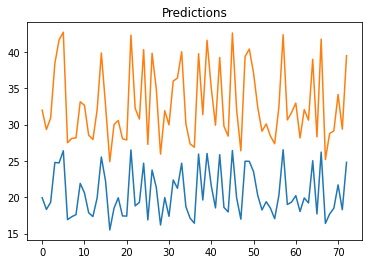

In [21]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
mavg_auto_cnn_mse

155.28632271361906

### RNN

Epoch 1/10
5/8 [=================>............] - ETA: 0s - loss: 996.1331 - root_mean_squared_error: 31.5616 INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 714ms/step - loss: 987.0442 - root_mean_squared_error: 31.4173 - val_loss: 1039.4725 - val_root_mean_squared_error: 32.2409
Epoch 2/10
1/8 [==>...........................] - ETA: 0s - loss: 1080.4589 - root_mean_squared_error: 32.8703INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 3s 468ms/step - loss: 977.2350 - root_mean_squared_error: 31.2608 - val_loss: 1032.3718 - val_root_mean_squared_error: 32.1305
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 968.9478 - root_mean_squared_error: 31.1279INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 520ms/step - loss: 968.9478 - root_mean_squared_error: 31.1279 - val_loss: 1025.2799 - val_root_mean_squared_error: 32.0200
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 966.7471 - root_mean_squared_error: 31.0926INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 524ms/step - loss: 966.7471 - root_mean_squared_error: 31.0926 - val_loss: 1018.1901 - val_root_mean_squared_error: 31.9091
Epoch 5/10
1/8 [==>...........................] - ETA: 0s - loss: 993.0953 - root_mean_squared_error: 31.5134INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 530ms/step - loss: 949.1147 - root_mean_squared_error: 30.8077 - val_loss: 1011.0071 - val_root_mean_squared_error: 31.7963
Epoch 6/10
1/8 [==>...........................] - ETA: 0s - loss: 979.6080 - root_mean_squared_error: 31.2987INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 569ms/step - loss: 946.7122 - root_mean_squared_error: 30.7687 - val_loss: 1003.7845 - val_root_mean_squared_error: 31.6826
Epoch 7/10
1/8 [==>...........................] - ETA: 0s - loss: 1067.4048 - root_mean_squared_error: 32.6712INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 594ms/step - loss: 945.8472 - root_mean_squared_error: 30.7546 - val_loss: 996.5737 - val_root_mean_squared_error: 31.5686
Epoch 8/10
1/8 [==>...........................] - ETA: 0s - loss: 935.0704 - root_mean_squared_error: 30.5789INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 626ms/step - loss: 930.6799 - root_mean_squared_error: 30.5070 - val_loss: 989.2606 - val_root_mean_squared_error: 31.4525
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 928.4730 - root_mean_squared_error: 30.4709INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 883ms/step - loss: 928.4730 - root_mean_squared_error: 30.4709 - val_loss: 981.6596 - val_root_mean_squared_error: 31.3314
Epoch 10/10
1/8 [==>...........................] - ETA: 0s - loss: 918.3840 - root_mean_squared_error: 30.3049INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 4ms/step


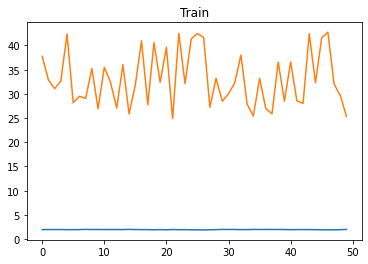

2/2 [==============================] - 1s 12ms/step


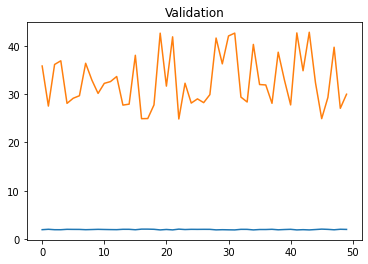

3/3 [==============================] - 0s 4ms/step


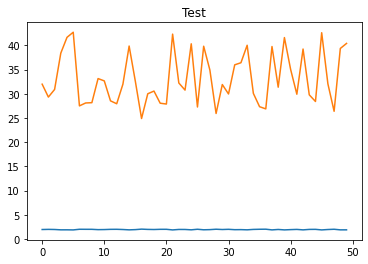

3/3 [==============================] - 0s 8ms/step


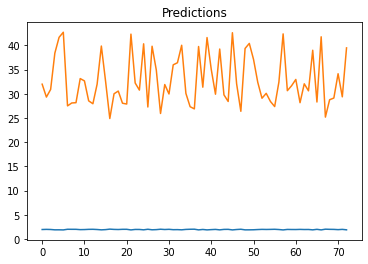

In [23]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [24]:
mavg_auto_rnn_mse

978.398830300908

### GRU

Epoch 1/10
7/8 [=========================>....] - ETA: 0s - loss: 1088.8241 - root_mean_squared_error: 32.9973 

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 22s 2s/step - loss: 1088.3560 - root_mean_squared_error: 32.9902 - val_loss: 1150.8298 - val_root_mean_squared_error: 33.9239
Epoch 2/10
5/8 [=================>............] - ETA: 0s - loss: 1069.7426 - root_mean_squared_error: 32.7069

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 1088.0991 - root_mean_squared_error: 32.9863 - val_loss: 1141.8872 - val_root_mean_squared_error: 33.7918
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 1077.5911 - root_mean_squared_error: 32.8267

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1071.5321 - root_mean_squared_error: 32.7343 - val_loss: 1132.9143 - val_root_mean_squared_error: 33.6588
Epoch 4/10
6/8 [=====================>........] - ETA: 0s - loss: 1078.3468 - root_mean_squared_error: 32.8382

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1066.2626 - root_mean_squared_error: 32.6537 - val_loss: 1123.9569 - val_root_mean_squared_error: 33.5255
Epoch 5/10
6/8 [=====================>........] - ETA: 0s - loss: 1060.7966 - root_mean_squared_error: 32.5699

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 1055.3236 - root_mean_squared_error: 32.4857 - val_loss: 1114.9708 - val_root_mean_squared_error: 33.3912
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 1047.1176 - root_mean_squared_error: 32.3592

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 1044.7161 - root_mean_squared_error: 32.3221 - val_loss: 1105.9226 - val_root_mean_squared_error: 33.2554
Epoch 7/10
7/8 [=========================>....] - ETA: 0s - loss: 1041.9752 - root_mean_squared_error: 32.2796

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 1040.4529 - root_mean_squared_error: 32.2561 - val_loss: 1096.8225 - val_root_mean_squared_error: 33.1183
Epoch 8/10
1/8 [==>...........................] - ETA: 0s - loss: 1138.4941 - root_mean_squared_error: 33.7416

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 1032.8496 - root_mean_squared_error: 32.1380 - val_loss: 1087.7250 - val_root_mean_squared_error: 32.9807
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 1025.5193 - root_mean_squared_error: 32.0237

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1019.9119 - root_mean_squared_error: 31.9361 - val_loss: 1078.7004 - val_root_mean_squared_error: 32.8436
Epoch 10/10
5/8 [=================>............] - ETA: 0s - loss: 984.6033 - root_mean_squared_error: 31.3784

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 18ms/step


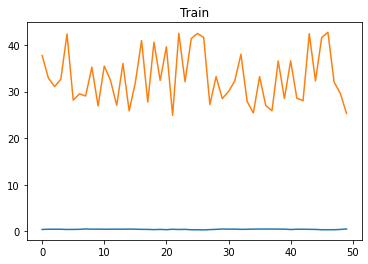

2/2 [==============================] - 2s 5ms/step


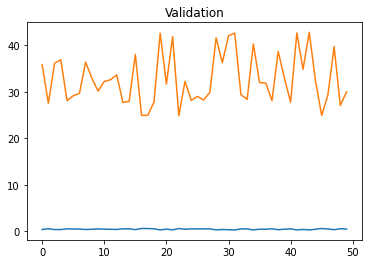

3/3 [==============================] - 0s 6ms/step


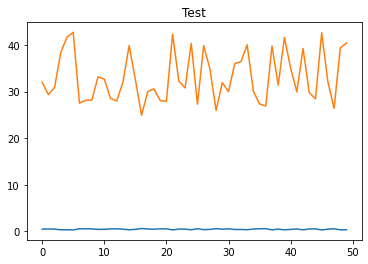

3/3 [==============================] - 0s 3ms/step


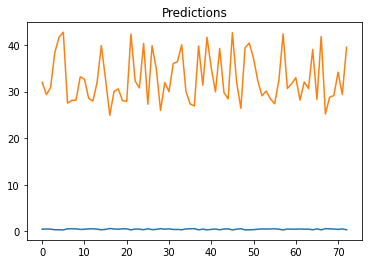

In [25]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [26]:
mavg_auto_gru_mse

1074.6308488590653

### LSTM

Epoch 1/10
5/8 [=================>............] - ETA: 0s - loss: 974.9655 - root_mean_squared_error: 31.2244  

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 976.8978 - root_mean_squared_error: 31.2554 - val_loss: 1035.2128 - val_root_mean_squared_error: 32.1747
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 972.1188 - root_mean_squared_error: 31.1788

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 972.1188 - root_mean_squared_error: 31.1788 - val_loss: 1030.4116 - val_root_mean_squared_error: 32.1000
Epoch 3/10
4/8 [==============>...............] - ETA: 0s - loss: 973.9877 - root_mean_squared_error: 31.2088

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 971.7170 - root_mean_squared_error: 31.1724 - val_loss: 1025.5759 - val_root_mean_squared_error: 32.0246
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 965.4073 - root_mean_squared_error: 31.0710

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 965.4073 - root_mean_squared_error: 31.0710 - val_loss: 1020.6978 - val_root_mean_squared_error: 31.9484
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 956.7731 - root_mean_squared_error: 30.9317 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 956.7731 - root_mean_squared_error: 30.9317 - val_loss: 1015.7611 - val_root_mean_squared_error: 31.8710
Epoch 6/10
7/8 [=========================>....] - ETA: 0s - loss: 946.7936 - root_mean_squared_error: 30.7700

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 950.9367 - root_mean_squared_error: 30.8373 - val_loss: 1010.7197 - val_root_mean_squared_error: 31.7918
Epoch 7/10
7/8 [=========================>....] - ETA: 0s - loss: 953.1942 - root_mean_squared_error: 30.8738

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 949.9853 - root_mean_squared_error: 30.8218 - val_loss: 1005.5724 - val_root_mean_squared_error: 31.7108
Epoch 8/10
5/8 [=================>............] - ETA: 0s - loss: 955.0900 - root_mean_squared_error: 30.9045

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 941.9578 - root_mean_squared_error: 30.6913 - val_loss: 1000.4119 - val_root_mean_squared_error: 31.6293
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 944.8024 - root_mean_squared_error: 30.7376

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 942.3323 - root_mean_squared_error: 30.6974 - val_loss: 995.2105 - val_root_mean_squared_error: 31.5470
Epoch 10/10
5/8 [=================>............] - ETA: 0s - loss: 940.1831 - root_mean_squared_error: 30.6624

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 2s 4ms/step


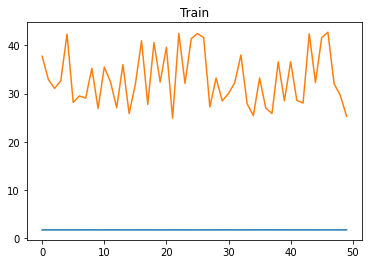

2/2 [==============================] - 1s 7ms/step


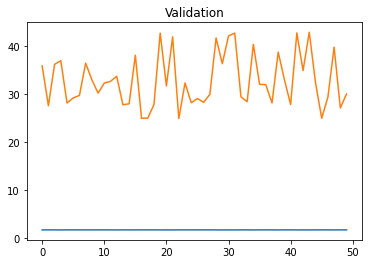

3/3 [==============================] - 0s 5ms/step


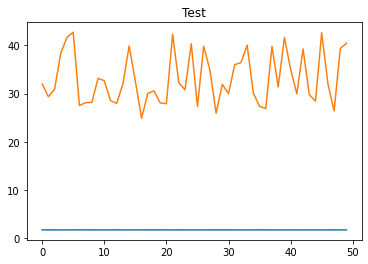

3/3 [==============================] - 0s 4ms/step


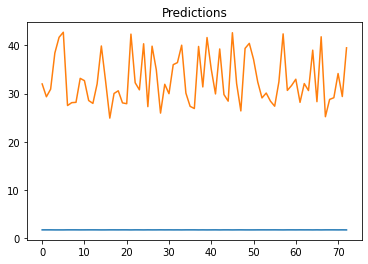

In [27]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [28]:
mavg_auto_lstm_mse

994.4747245311295

# Hybrid

## General

### CNN LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 989.1970 - root_mean_squared_error: 31.4515

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 47s 5s/step - loss: 989.1970 - root_mean_squared_error: 31.4515 - val_loss: 1029.8899 - val_root_mean_squared_error: 32.0919
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 964.5222 - root_mean_squared_error: 31.0568

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 962.1356 - root_mean_squared_error: 31.0183 - val_loss: 1004.1828 - val_root_mean_squared_error: 31.6888
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 939.8159 - root_mean_squared_error: 30.6564

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 938.7120 - root_mean_squared_error: 30.6384 - val_loss: 981.9123 - val_root_mean_squared_error: 31.3355
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 918.1185 - root_mean_squared_error: 30.3005

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 918.1185 - root_mean_squared_error: 30.3005 - val_loss: 962.3314 - val_root_mean_squared_error: 31.0215
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 899.9449 - root_mean_squared_error: 29.9991

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 899.9449 - root_mean_squared_error: 29.9991 - val_loss: 944.8484 - val_root_mean_squared_error: 30.7384
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 883.6786 - root_mean_squared_error: 29.7267

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 883.6786 - root_mean_squared_error: 29.7267 - val_loss: 929.3075 - val_root_mean_squared_error: 30.4845
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 869.1783 - root_mean_squared_error: 29.4818

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 869.1783 - root_mean_squared_error: 29.4818 - val_loss: 915.3809 - val_root_mean_squared_error: 30.2553
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 856.1325 - root_mean_squared_error: 29.2597

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 856.1325 - root_mean_squared_error: 29.2597 - val_loss: 902.7023 - val_root_mean_squared_error: 30.0450
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 842.2944 - root_mean_squared_error: 29.0223

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 844.1667 - root_mean_squared_error: 29.0545 - val_loss: 890.7073 - val_root_mean_squared_error: 29.8447
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 832.6712 - root_mean_squared_error: 28.8560

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 832.6712 - root_mean_squared_error: 28.8560 - val_loss: 879.1001 - val_root_mean_squared_error: 29.6496
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 824.0787 - root_mean_squared_error: 28.7068

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 821.4113 - root_mean_squared_error: 28.6603 - val_loss: 867.6662 - val_root_mean_squared_error: 29.4562
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 810.3911 - root_mean_squared_error: 28.4674

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 810.3911 - root_mean_squared_error: 28.4674 - val_loss: 856.2854 - val_root_mean_squared_error: 29.2624
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 796.4170 - root_mean_squared_error: 28.2209

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 799.3718 - root_mean_squared_error: 28.2732 - val_loss: 844.9631 - val_root_mean_squared_error: 29.0682
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 790.0245 - root_mean_squared_error: 28.1074

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 788.4940 - root_mean_squared_error: 28.0801 - val_loss: 833.7782 - val_root_mean_squared_error: 28.8752
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 777.7156 - root_mean_squared_error: 27.8876

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 777.7156 - root_mean_squared_error: 27.8876 - val_loss: 822.8672 - val_root_mean_squared_error: 28.6857
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 770.1393 - root_mean_squared_error: 27.7514

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 767.3051 - root_mean_squared_error: 27.7003 - val_loss: 812.1138 - val_root_mean_squared_error: 28.4976
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 754.3517 - root_mean_squared_error: 27.4655

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 756.9957 - root_mean_squared_error: 27.5136 - val_loss: 801.6685 - val_root_mean_squared_error: 28.3138
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 747.0192 - root_mean_squared_error: 27.3317

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 747.0192 - root_mean_squared_error: 27.3317 - val_loss: 791.3748 - val_root_mean_squared_error: 28.1314
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 737.1230 - root_mean_squared_error: 27.1500

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 737.1230 - root_mean_squared_error: 27.1500 - val_loss: 781.3020 - val_root_mean_squared_error: 27.9518
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 731.0589 - root_mean_squared_error: 27.0381

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 727.5433 - root_mean_squared_error: 26.9730 - val_loss: 771.4271 - val_root_mean_squared_error: 27.7746
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 719.6365 - root_mean_squared_error: 26.8260

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 718.1100 - root_mean_squared_error: 26.7976 - val_loss: 761.8796 - val_root_mean_squared_error: 27.6022
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 708.2549 - root_mean_squared_error: 26.6131

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 708.9743 - root_mean_squared_error: 26.6266 - val_loss: 752.5789 - val_root_mean_squared_error: 27.4332
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 695.1476 - root_mean_squared_error: 26.3657

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 700.0770 - root_mean_squared_error: 26.4590 - val_loss: 743.5663 - val_root_mean_squared_error: 27.2684
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 695.4504 - root_mean_squared_error: 26.3714

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 691.5000 - root_mean_squared_error: 26.2964 - val_loss: 735.0009 - val_root_mean_squared_error: 27.1109
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 683.4758 - root_mean_squared_error: 26.1434

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 683.4758 - root_mean_squared_error: 26.1434 - val_loss: 727.0419 - val_root_mean_squared_error: 26.9637
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 676.0327 - root_mean_squared_error: 26.0006

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 676.0327 - root_mean_squared_error: 26.0006 - val_loss: 719.6208 - val_root_mean_squared_error: 26.8258
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 669.0914 - root_mean_squared_error: 25.8668

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 669.0914 - root_mean_squared_error: 25.8668 - val_loss: 712.8118 - val_root_mean_squared_error: 26.6985
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 663.2150 - root_mean_squared_error: 25.7530

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 662.7382 - root_mean_squared_error: 25.7437 - val_loss: 706.5273 - val_root_mean_squared_error: 26.5806
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 659.8909 - root_mean_squared_error: 25.6883

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 656.8284 - root_mean_squared_error: 25.6287 - val_loss: 700.6929 - val_root_mean_squared_error: 26.4706
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 653.8098 - root_mean_squared_error: 25.5697

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 651.3409 - root_mean_squared_error: 25.5214 - val_loss: 695.2486 - val_root_mean_squared_error: 26.3676
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 650.5243 - root_mean_squared_error: 25.5054

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 646.1991 - root_mean_squared_error: 25.4204 - val_loss: 690.0992 - val_root_mean_squared_error: 26.2697
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 641.3232 - root_mean_squared_error: 25.3244

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 641.3232 - root_mean_squared_error: 25.3244 - val_loss: 685.1849 - val_root_mean_squared_error: 26.1760
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 636.6545 - root_mean_squared_error: 25.2320

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 636.6545 - root_mean_squared_error: 25.2320 - val_loss: 680.4597 - val_root_mean_squared_error: 26.0856
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 632.1599 - root_mean_squared_error: 25.1428

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 632.1599 - root_mean_squared_error: 25.1428 - val_loss: 675.9430 - val_root_mean_squared_error: 25.9989
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 627.4068 - root_mean_squared_error: 25.0481

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 627.8966 - root_mean_squared_error: 25.0579 - val_loss: 671.7079 - val_root_mean_squared_error: 25.9173
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 623.9203 - root_mean_squared_error: 24.9784

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 623.9203 - root_mean_squared_error: 24.9784 - val_loss: 667.7836 - val_root_mean_squared_error: 25.8415
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 618.8884 - root_mean_squared_error: 24.8775

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 620.2501 - root_mean_squared_error: 24.9048 - val_loss: 664.1494 - val_root_mean_squared_error: 25.7711
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 616.0943 - root_mean_squared_error: 24.8212

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 616.8666 - root_mean_squared_error: 24.8368 - val_loss: 660.7524 - val_root_mean_squared_error: 25.7051
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 613.6563 - root_mean_squared_error: 24.7721

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 613.6563 - root_mean_squared_error: 24.7721 - val_loss: 657.5825 - val_root_mean_squared_error: 25.6434
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 610.6659 - root_mean_squared_error: 24.7117

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 610.6659 - root_mean_squared_error: 24.7117 - val_loss: 654.5795 - val_root_mean_squared_error: 25.5848
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 607.2349 - root_mean_squared_error: 24.6421

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 607.8159 - root_mean_squared_error: 24.6539 - val_loss: 651.7367 - val_root_mean_squared_error: 25.5291
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 605.1123 - root_mean_squared_error: 24.5990

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 605.1123 - root_mean_squared_error: 24.5990 - val_loss: 649.0152 - val_root_mean_squared_error: 25.4758
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 599.0688 - root_mean_squared_error: 24.4759

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 602.5279 - root_mean_squared_error: 24.5464 - val_loss: 646.4050 - val_root_mean_squared_error: 25.4245
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 600.5019 - root_mean_squared_error: 24.5051

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 600.0441 - root_mean_squared_error: 24.4958 - val_loss: 643.8666 - val_root_mean_squared_error: 25.3745
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 601.9839 - root_mean_squared_error: 24.5354

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 597.6236 - root_mean_squared_error: 24.4463 - val_loss: 641.4197 - val_root_mean_squared_error: 25.3263
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 594.5970 - root_mean_squared_error: 24.3844

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 595.3017 - root_mean_squared_error: 24.3988 - val_loss: 639.0460 - val_root_mean_squared_error: 25.2794
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 593.0228 - root_mean_squared_error: 24.3521

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 593.0228 - root_mean_squared_error: 24.3521 - val_loss: 636.7307 - val_root_mean_squared_error: 25.2335
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 588.2438 - root_mean_squared_error: 24.2537

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 590.8138 - root_mean_squared_error: 24.3067 - val_loss: 634.4594 - val_root_mean_squared_error: 25.1885
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 589.7920 - root_mean_squared_error: 24.2856

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 588.6364 - root_mean_squared_error: 24.2618 - val_loss: 632.2540 - val_root_mean_squared_error: 25.1447
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 586.5827 - root_mean_squared_error: 24.2195

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 4s 22ms/step


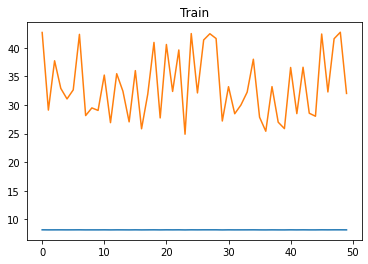

2/2 [==============================] - 4s 42ms/step


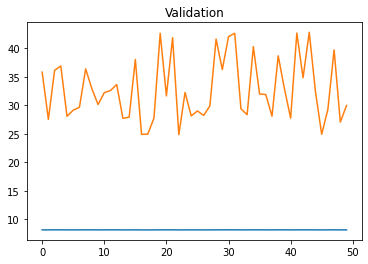

3/3 [==============================] - 0s 13ms/step


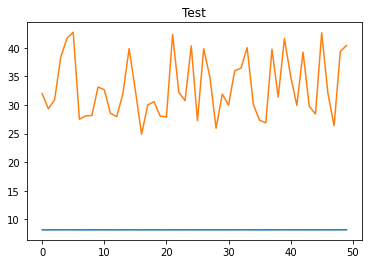

3/3 [==============================] - 0s 8ms/step


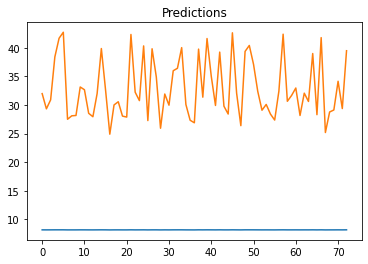

In [29]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [30]:
hybrid_cnn_lstm_mse

633.4592509821147

### RNN LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1044.2555 - root_mean_squared_error: 32.3149 

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 31s 3s/step - loss: 1041.8201 - root_mean_squared_error: 32.2772 - val_loss: 1091.4121 - val_root_mean_squared_error: 33.0365
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1025.2173 - root_mean_squared_error: 32.0190

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 1025.2173 - root_mean_squared_error: 32.0190 - val_loss: 1074.5189 - val_root_mean_squared_error: 32.7799
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 1007.4928 - root_mean_squared_error: 31.7410

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 1008.9266 - root_mean_squared_error: 31.7636 - val_loss: 1057.8660 - val_root_mean_squared_error: 32.5249
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 992.8361 - root_mean_squared_error: 31.5093

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 992.8361 - root_mean_squared_error: 31.5093 - val_loss: 1041.4146 - val_root_mean_squared_error: 32.2710
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 974.4644 - root_mean_squared_error: 31.2164

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 976.9651 - root_mean_squared_error: 31.2564 - val_loss: 1025.0837 - val_root_mean_squared_error: 32.0169
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 961.2064 - root_mean_squared_error: 31.0033

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 961.2064 - root_mean_squared_error: 31.0033 - val_loss: 1009.0363 - val_root_mean_squared_error: 31.7653
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 934.0859 - root_mean_squared_error: 30.5628

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 945.7924 - root_mean_squared_error: 30.7537 - val_loss: 993.3959 - val_root_mean_squared_error: 31.5182
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 932.5682 - root_mean_squared_error: 30.5380

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 930.7018 - root_mean_squared_error: 30.5074 - val_loss: 978.1061 - val_root_mean_squared_error: 31.2747
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 916.0682 - root_mean_squared_error: 30.2666

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 916.0682 - root_mean_squared_error: 30.2666 - val_loss: 963.1015 - val_root_mean_squared_error: 31.0339
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 900.3038 - root_mean_squared_error: 30.0051

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 901.7109 - root_mean_squared_error: 30.0285 - val_loss: 948.3510 - val_root_mean_squared_error: 30.7953
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 885.4140 - root_mean_squared_error: 29.7559

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 887.5073 - root_mean_squared_error: 29.7911 - val_loss: 933.9474 - val_root_mean_squared_error: 30.5606
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 873.6201 - root_mean_squared_error: 29.5571

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 873.6201 - root_mean_squared_error: 29.5571 - val_loss: 919.7862 - val_root_mean_squared_error: 30.3280
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 867.9751 - root_mean_squared_error: 29.4614

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 860.0721 - root_mean_squared_error: 29.3270 - val_loss: 905.8366 - val_root_mean_squared_error: 30.0971
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 827.3537 - root_mean_squared_error: 28.7638

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 846.6520 - root_mean_squared_error: 29.0973 - val_loss: 892.2535 - val_root_mean_squared_error: 29.8706
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 836.8326 - root_mean_squared_error: 28.9281

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 833.6070 - root_mean_squared_error: 28.8723 - val_loss: 878.8713 - val_root_mean_squared_error: 29.6458
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 812.1644 - root_mean_squared_error: 28.4985

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 820.6948 - root_mean_squared_error: 28.6478 - val_loss: 865.7188 - val_root_mean_squared_error: 29.4231
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 807.3537 - root_mean_squared_error: 28.4140

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 808.1189 - root_mean_squared_error: 28.4274 - val_loss: 852.7382 - val_root_mean_squared_error: 29.2017
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 789.2717 - root_mean_squared_error: 28.0940

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 795.5688 - root_mean_squared_error: 28.2058 - val_loss: 840.1316 - val_root_mean_squared_error: 28.9850
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 773.1587 - root_mean_squared_error: 27.8057

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 783.5025 - root_mean_squared_error: 27.9911 - val_loss: 827.8074 - val_root_mean_squared_error: 28.7716
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 759.3968 - root_mean_squared_error: 27.5572

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 771.6970 - root_mean_squared_error: 27.7794 - val_loss: 815.7950 - val_root_mean_squared_error: 28.5621
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 760.2592 - root_mean_squared_error: 27.5728

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 760.2592 - root_mean_squared_error: 27.5728 - val_loss: 804.1758 - val_root_mean_squared_error: 28.3580
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 749.2361 - root_mean_squared_error: 27.3722

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 749.2361 - root_mean_squared_error: 27.3722 - val_loss: 792.9635 - val_root_mean_squared_error: 28.1596
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 729.5952 - root_mean_squared_error: 27.0110

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 738.5355 - root_mean_squared_error: 27.1760 - val_loss: 782.2786 - val_root_mean_squared_error: 27.9692
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 728.3434 - root_mean_squared_error: 26.9878

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 728.3434 - root_mean_squared_error: 26.9878 - val_loss: 772.0286 - val_root_mean_squared_error: 27.7854
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 708.4046 - root_mean_squared_error: 26.6159

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 718.5404 - root_mean_squared_error: 26.8056 - val_loss: 762.1925 - val_root_mean_squared_error: 27.6078
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 715.6813 - root_mean_squared_error: 26.7522

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 709.1950 - root_mean_squared_error: 26.6307 - val_loss: 752.7364 - val_root_mean_squared_error: 27.4360
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 691.4690 - root_mean_squared_error: 26.2958

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 700.2021 - root_mean_squared_error: 26.4613 - val_loss: 743.6827 - val_root_mean_squared_error: 27.2705
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 693.6883 - root_mean_squared_error: 26.3380

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 691.5886 - root_mean_squared_error: 26.2981 - val_loss: 734.9720 - val_root_mean_squared_error: 27.1104
Epoch 29/50
4/8 [==============>...............] - ETA: 0s - loss: 674.2588 - root_mean_squared_error: 25.9665

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 683.3099 - root_mean_squared_error: 26.1402 - val_loss: 726.6238 - val_root_mean_squared_error: 26.9560
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 675.3389 - root_mean_squared_error: 25.9873

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 675.3389 - root_mean_squared_error: 25.9873 - val_loss: 718.5156 - val_root_mean_squared_error: 26.8051
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 665.7284 - root_mean_squared_error: 25.8017

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 667.5640 - root_mean_squared_error: 25.8373 - val_loss: 710.5864 - val_root_mean_squared_error: 26.6568
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 663.7543 - root_mean_squared_error: 25.7634

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 659.9193 - root_mean_squared_error: 25.6889 - val_loss: 702.7285 - val_root_mean_squared_error: 26.5090
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 654.4340 - root_mean_squared_error: 25.5819

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 652.3413 - root_mean_squared_error: 25.5410 - val_loss: 694.8776 - val_root_mean_squared_error: 26.3605
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 654.7128 - root_mean_squared_error: 25.5874

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 644.7765 - root_mean_squared_error: 25.3925 - val_loss: 686.9631 - val_root_mean_squared_error: 26.2100
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 647.6948 - root_mean_squared_error: 25.4499

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 637.1298 - root_mean_squared_error: 25.2414 - val_loss: 679.0546 - val_root_mean_squared_error: 26.0587
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 617.5869 - root_mean_squared_error: 24.8513

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 629.4898 - root_mean_squared_error: 25.0896 - val_loss: 671.2321 - val_root_mean_squared_error: 25.9081
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 621.9678 - root_mean_squared_error: 24.9393

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 621.9678 - root_mean_squared_error: 24.9393 - val_loss: 663.5447 - val_root_mean_squared_error: 25.7594
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 611.6351 - root_mean_squared_error: 24.7313

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 614.6497 - root_mean_squared_error: 24.7921 - val_loss: 656.1561 - val_root_mean_squared_error: 25.6155
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 607.6890 - root_mean_squared_error: 24.6514

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 607.6890 - root_mean_squared_error: 24.6514 - val_loss: 649.1502 - val_root_mean_squared_error: 25.4784
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 602.4379 - root_mean_squared_error: 24.5446

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 601.1265 - root_mean_squared_error: 24.5179 - val_loss: 642.6456 - val_root_mean_squared_error: 25.3505
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 597.0755 - root_mean_squared_error: 24.4351

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 595.0049 - root_mean_squared_error: 24.3927 - val_loss: 636.6155 - val_root_mean_squared_error: 25.2312
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 582.4099 - root_mean_squared_error: 24.1332

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 589.3381 - root_mean_squared_error: 24.2763 - val_loss: 630.9988 - val_root_mean_squared_error: 25.1197
Epoch 43/50
4/8 [==============>...............] - ETA: 0s - loss: 595.8372 - root_mean_squared_error: 24.4098

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 584.0894 - root_mean_squared_error: 24.1679 - val_loss: 625.7031 - val_root_mean_squared_error: 25.0141
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 579.1224 - root_mean_squared_error: 24.0650

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 579.1224 - root_mean_squared_error: 24.0650 - val_loss: 620.7891 - val_root_mean_squared_error: 24.9156
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 574.5176 - root_mean_squared_error: 23.9691

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 574.5176 - root_mean_squared_error: 23.9691 - val_loss: 616.1744 - val_root_mean_squared_error: 24.8229
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 570.1882 - root_mean_squared_error: 23.8786

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 570.1882 - root_mean_squared_error: 23.8786 - val_loss: 611.8500 - val_root_mean_squared_error: 24.7356
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 567.3918 - root_mean_squared_error: 23.8200

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 566.1334 - root_mean_squared_error: 23.7936 - val_loss: 607.7975 - val_root_mean_squared_error: 24.6536
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 565.9122 - root_mean_squared_error: 23.7889

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 562.3317 - root_mean_squared_error: 23.7135 - val_loss: 603.9876 - val_root_mean_squared_error: 24.5762
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 550.6020 - root_mean_squared_error: 23.4649

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 558.7263 - root_mean_squared_error: 23.6374 - val_loss: 600.3974 - val_root_mean_squared_error: 24.5030
Epoch 50/50
4/8 [==============>...............] - ETA: 0s - loss: 557.5590 - root_mean_squared_error: 23.6127

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 2s 9ms/step


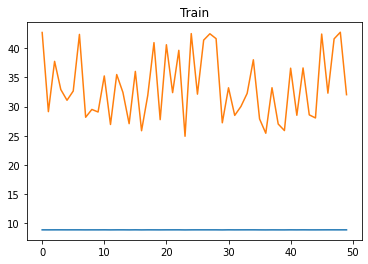

2/2 [==============================] - 2s 9ms/step


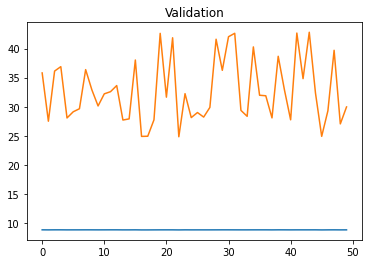

3/3 [==============================] - 0s 46ms/step


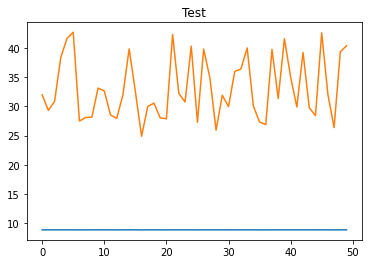

3/3 [==============================] - 0s 6ms/step


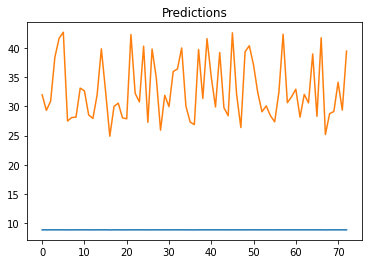

In [31]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [32]:
hybrid_rnn_lstm_mse

600.1701787028942

### RNN GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1033.8220 - root_mean_squared_error: 32.1531

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 51s 4s/step - loss: 1035.2336 - root_mean_squared_error: 32.1750 - val_loss: 1083.3500 - val_root_mean_squared_error: 32.9143
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1018.1837 - root_mean_squared_error: 31.9090

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 1016.9651 - root_mean_squared_error: 31.8899 - val_loss: 1064.7306 - val_root_mean_squared_error: 32.6302
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 1000.5678 - root_mean_squared_error: 31.6318

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 999.0063 - root_mean_squared_error: 31.6071 - val_loss: 1046.5120 - val_root_mean_squared_error: 32.3498
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 986.6865 - root_mean_squared_error: 31.4116

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 981.3989 - root_mean_squared_error: 31.3273 - val_loss: 1028.7111 - val_root_mean_squared_error: 32.0735
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 964.3776 - root_mean_squared_error: 31.0544 

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 964.3776 - root_mean_squared_error: 31.0544 - val_loss: 1011.2306 - val_root_mean_squared_error: 31.7999
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 951.3576 - root_mean_squared_error: 30.8441

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 947.4601 - root_mean_squared_error: 30.7808 - val_loss: 994.1314 - val_root_mean_squared_error: 31.5299
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 930.8958 - root_mean_squared_error: 30.5106

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 930.8958 - root_mean_squared_error: 30.5106 - val_loss: 977.2585 - val_root_mean_squared_error: 31.2611
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 916.9011 - root_mean_squared_error: 30.2804

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 914.6706 - root_mean_squared_error: 30.2435 - val_loss: 960.6138 - val_root_mean_squared_error: 30.9938
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 907.3776 - root_mean_squared_error: 30.1227

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 898.7151 - root_mean_squared_error: 29.9786 - val_loss: 944.2833 - val_root_mean_squared_error: 30.7292
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 902.0662 - root_mean_squared_error: 30.0344

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 882.9661 - root_mean_squared_error: 29.7147 - val_loss: 928.3830 - val_root_mean_squared_error: 30.4694
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 859.0310 - root_mean_squared_error: 29.3092

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 867.6083 - root_mean_squared_error: 29.4552 - val_loss: 912.8209 - val_root_mean_squared_error: 30.2129
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 852.6813 - root_mean_squared_error: 29.2007

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 852.6813 - root_mean_squared_error: 29.2007 - val_loss: 897.5603 - val_root_mean_squared_error: 29.9593
Epoch 13/50
4/8 [==============>...............] - ETA: 0s - loss: 845.2440 - root_mean_squared_error: 29.0731

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 838.0618 - root_mean_squared_error: 28.9493 - val_loss: 882.7487 - val_root_mean_squared_error: 29.7111
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 823.6852 - root_mean_squared_error: 28.6999

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 823.8157 - root_mean_squared_error: 28.7022 - val_loss: 868.3743 - val_root_mean_squared_error: 29.4682
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 788.3095 - root_mean_squared_error: 28.0769

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 809.9912 - root_mean_squared_error: 28.4603 - val_loss: 854.4879 - val_root_mean_squared_error: 29.2316
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 796.8040 - root_mean_squared_error: 28.2277

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 796.8040 - root_mean_squared_error: 28.2277 - val_loss: 841.0356 - val_root_mean_squared_error: 29.0006
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 783.9993 - root_mean_squared_error: 28.0000

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 783.9993 - root_mean_squared_error: 28.0000 - val_loss: 828.2684 - val_root_mean_squared_error: 28.7797
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 775.1177 - root_mean_squared_error: 27.8409

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 771.8004 - root_mean_squared_error: 27.7813 - val_loss: 816.0255 - val_root_mean_squared_error: 28.5662
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 760.2059 - root_mean_squared_error: 27.5718

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 760.2059 - root_mean_squared_error: 27.5718 - val_loss: 804.4318 - val_root_mean_squared_error: 28.3625
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 745.9461 - root_mean_squared_error: 27.3120

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 749.2144 - root_mean_squared_error: 27.3718 - val_loss: 793.4714 - val_root_mean_squared_error: 28.1686
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 740.1834 - root_mean_squared_error: 27.2063

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 738.8478 - root_mean_squared_error: 27.1818 - val_loss: 783.0974 - val_root_mean_squared_error: 27.9839
Epoch 22/50
4/8 [==============>...............] - ETA: 0s - loss: 722.0000 - root_mean_squared_error: 26.8701

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 729.0413 - root_mean_squared_error: 27.0008 - val_loss: 773.3424 - val_root_mean_squared_error: 27.8090
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 719.8727 - root_mean_squared_error: 26.8304

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 719.8727 - root_mean_squared_error: 26.8304 - val_loss: 764.1447 - val_root_mean_squared_error: 27.6432
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 714.1813 - root_mean_squared_error: 26.7242

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 711.2129 - root_mean_squared_error: 26.6686 - val_loss: 755.5471 - val_root_mean_squared_error: 27.4872
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 706.0244 - root_mean_squared_error: 26.5711

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 703.0818 - root_mean_squared_error: 26.5157 - val_loss: 747.4682 - val_root_mean_squared_error: 27.3399
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 693.3429 - root_mean_squared_error: 26.3314

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 695.4611 - root_mean_squared_error: 26.3716 - val_loss: 739.8236 - val_root_mean_squared_error: 27.1997
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 690.0296 - root_mean_squared_error: 26.2684

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 688.2364 - root_mean_squared_error: 26.2343 - val_loss: 732.5547 - val_root_mean_squared_error: 27.0657
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 681.3668 - root_mean_squared_error: 26.1030

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 681.3668 - root_mean_squared_error: 26.1030 - val_loss: 725.6900 - val_root_mean_squared_error: 26.9386
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 679.3824 - root_mean_squared_error: 26.0650

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 674.8570 - root_mean_squared_error: 25.9780 - val_loss: 719.1616 - val_root_mean_squared_error: 26.8172
Epoch 30/50
4/8 [==============>...............] - ETA: 0s - loss: 676.8453 - root_mean_squared_error: 26.0163

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 668.7145 - root_mean_squared_error: 25.8595 - val_loss: 712.9790 - val_root_mean_squared_error: 26.7017
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 658.2085 - root_mean_squared_error: 25.6556

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 662.8464 - root_mean_squared_error: 25.7458 - val_loss: 707.0898 - val_root_mean_squared_error: 26.5912
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 657.2775 - root_mean_squared_error: 25.6374

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 657.2775 - root_mean_squared_error: 25.6374 - val_loss: 701.4630 - val_root_mean_squared_error: 26.4851
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 651.9467 - root_mean_squared_error: 25.5332

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 651.9467 - root_mean_squared_error: 25.5332 - val_loss: 696.0992 - val_root_mean_squared_error: 26.3837
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 646.8608 - root_mean_squared_error: 25.4335

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 646.8608 - root_mean_squared_error: 25.4335 - val_loss: 690.9577 - val_root_mean_squared_error: 26.2861
Epoch 35/50
4/8 [==============>...............] - ETA: 0s - loss: 656.2408 - root_mean_squared_error: 25.6172

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 641.9795 - root_mean_squared_error: 25.3373 - val_loss: 686.0314 - val_root_mean_squared_error: 26.1922
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 630.7065 - root_mean_squared_error: 25.1139

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 637.2857 - root_mean_squared_error: 25.2445 - val_loss: 681.3470 - val_root_mean_squared_error: 26.1026
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 622.4594 - root_mean_squared_error: 24.9491

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 632.8310 - root_mean_squared_error: 25.1561 - val_loss: 676.8444 - val_root_mean_squared_error: 26.0162
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 601.3042 - root_mean_squared_error: 24.5215

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 628.5431 - root_mean_squared_error: 25.0708 - val_loss: 672.4899 - val_root_mean_squared_error: 25.9324
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 624.4343 - root_mean_squared_error: 24.9887

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 624.4343 - root_mean_squared_error: 24.9887 - val_loss: 668.3308 - val_root_mean_squared_error: 25.8521
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 586.1367 - root_mean_squared_error: 24.2103

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 620.4914 - root_mean_squared_error: 24.9097 - val_loss: 664.3651 - val_root_mean_squared_error: 25.7753
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 614.7375 - root_mean_squared_error: 24.7939

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 616.7582 - root_mean_squared_error: 24.8346 - val_loss: 660.5696 - val_root_mean_squared_error: 25.7015
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 609.2492 - root_mean_squared_error: 24.6830

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 613.1736 - root_mean_squared_error: 24.7623 - val_loss: 656.9525 - val_root_mean_squared_error: 25.6311
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 601.0894 - root_mean_squared_error: 24.5171

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 609.7492 - root_mean_squared_error: 24.6931 - val_loss: 653.5059 - val_root_mean_squared_error: 25.5638
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 603.8451 - root_mean_squared_error: 24.5733

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 606.5074 - root_mean_squared_error: 24.6274 - val_loss: 650.2384 - val_root_mean_squared_error: 25.4998
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 603.4134 - root_mean_squared_error: 24.5645

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 603.4134 - root_mean_squared_error: 24.5645 - val_loss: 647.1330 - val_root_mean_squared_error: 25.4388
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 600.4925 - root_mean_squared_error: 24.5049

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 600.4925 - root_mean_squared_error: 24.5049 - val_loss: 644.1783 - val_root_mean_squared_error: 25.3807
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 600.5293 - root_mean_squared_error: 24.5057

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 597.7008 - root_mean_squared_error: 24.4479 - val_loss: 641.3809 - val_root_mean_squared_error: 25.3255
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 604.1235 - root_mean_squared_error: 24.5789

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 595.0588 - root_mean_squared_error: 24.3938 - val_loss: 638.7032 - val_root_mean_squared_error: 25.2726
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 602.4795 - root_mean_squared_error: 24.5455

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 592.5193 - root_mean_squared_error: 24.3417 - val_loss: 636.1297 - val_root_mean_squared_error: 25.2216
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 571.1403 - root_mean_squared_error: 23.8985

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 4s 10ms/step


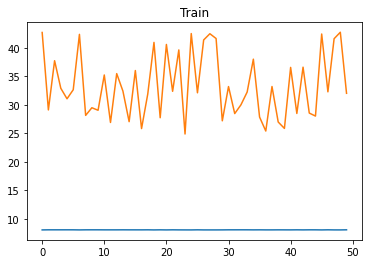

2/2 [==============================] - 4s 88ms/step


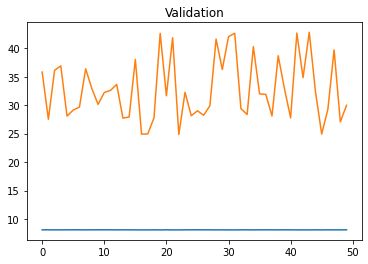

3/3 [==============================] - 0s 49ms/step


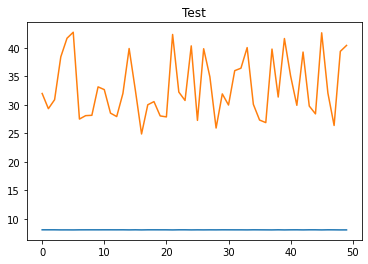

3/3 [==============================] - 0s 5ms/step


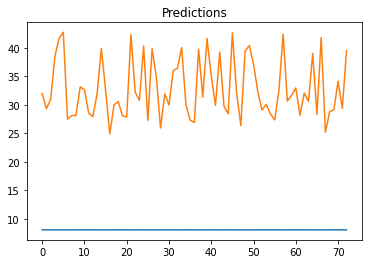

In [33]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
hybrid_rnn_gru_mse

637.0130735415246

### CNN GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1035.9578 - root_mean_squared_error: 32.1863

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 59s 6s/step - loss: 1035.9578 - root_mean_squared_error: 32.1863 - val_loss: 1073.3782 - val_root_mean_squared_error: 32.7625
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1000.5032 - root_mean_squared_error: 31.6307

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 1000.5032 - root_mean_squared_error: 31.6307 - val_loss: 1038.5962 - val_root_mean_squared_error: 32.2273
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 965.9085 - root_mean_squared_error: 31.0791

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 967.6689 - root_mean_squared_error: 31.1074 - val_loss: 1006.4981 - val_root_mean_squared_error: 31.7254
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 937.4230 - root_mean_squared_error: 30.6174

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 937.4230 - root_mean_squared_error: 30.6174 - val_loss: 976.5820 - val_root_mean_squared_error: 31.2503
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 909.2697 - root_mean_squared_error: 30.1541

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 909.2697 - root_mean_squared_error: 30.1541 - val_loss: 948.5610 - val_root_mean_squared_error: 30.7987
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 882.9550 - root_mean_squared_error: 29.7146

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 882.9550 - root_mean_squared_error: 29.7146 - val_loss: 922.3528 - val_root_mean_squared_error: 30.3703
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 858.1851 - root_mean_squared_error: 29.2948

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 858.1851 - root_mean_squared_error: 29.2948 - val_loss: 897.6542 - val_root_mean_squared_error: 29.9609
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 834.8487 - root_mean_squared_error: 28.8937

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 834.8487 - root_mean_squared_error: 28.8937 - val_loss: 874.1263 - val_root_mean_squared_error: 29.5656
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 812.3211 - root_mean_squared_error: 28.5012

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 812.3211 - root_mean_squared_error: 28.5012 - val_loss: 851.3537 - val_root_mean_squared_error: 29.1780
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 790.5448 - root_mean_squared_error: 28.1166

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 790.5448 - root_mean_squared_error: 28.1166 - val_loss: 829.1637 - val_root_mean_squared_error: 28.7952
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 769.2950 - root_mean_squared_error: 27.7362

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 769.4382 - root_mean_squared_error: 27.7388 - val_loss: 807.8566 - val_root_mean_squared_error: 28.4228
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 749.2949 - root_mean_squared_error: 27.3733

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 749.2949 - root_mean_squared_error: 27.3733 - val_loss: 788.0836 - val_root_mean_squared_error: 28.0728
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 734.3643 - root_mean_squared_error: 27.0992

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 730.9056 - root_mean_squared_error: 27.0353 - val_loss: 769.9954 - val_root_mean_squared_error: 27.7488
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 713.7390 - root_mean_squared_error: 26.7159

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 714.1674 - root_mean_squared_error: 26.7239 - val_loss: 753.6855 - val_root_mean_squared_error: 27.4533
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 700.4662 - root_mean_squared_error: 26.4663

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 698.9550 - root_mean_squared_error: 26.4378 - val_loss: 739.0178 - val_root_mean_squared_error: 27.1849
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 680.4039 - root_mean_squared_error: 26.0846

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 685.3989 - root_mean_squared_error: 26.1801 - val_loss: 725.8849 - val_root_mean_squared_error: 26.9423
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 671.5718 - root_mean_squared_error: 25.9147

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 673.1174 - root_mean_squared_error: 25.9445 - val_loss: 714.1710 - val_root_mean_squared_error: 26.7240
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 662.3688 - root_mean_squared_error: 25.7365

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 662.3688 - root_mean_squared_error: 25.7365 - val_loss: 703.6161 - val_root_mean_squared_error: 26.5258
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 652.5640 - root_mean_squared_error: 25.5453

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 652.5640 - root_mean_squared_error: 25.5453 - val_loss: 694.2546 - val_root_mean_squared_error: 26.3487
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 643.8196 - root_mean_squared_error: 25.3736

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 643.8196 - root_mean_squared_error: 25.3736 - val_loss: 685.7609 - val_root_mean_squared_error: 26.1870
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 641.3531 - root_mean_squared_error: 25.3249

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 635.9589 - root_mean_squared_error: 25.2182 - val_loss: 677.9731 - val_root_mean_squared_error: 26.0379
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 627.7743 - root_mean_squared_error: 25.0554

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 628.6586 - root_mean_squared_error: 25.0731 - val_loss: 670.9527 - val_root_mean_squared_error: 25.9028
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 616.1505 - root_mean_squared_error: 24.8224

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 622.1255 - root_mean_squared_error: 24.9424 - val_loss: 664.4971 - val_root_mean_squared_error: 25.7778
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 619.0063 - root_mean_squared_error: 24.8798

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 616.0896 - root_mean_squared_error: 24.8212 - val_loss: 658.5698 - val_root_mean_squared_error: 25.6626
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 610.5759 - root_mean_squared_error: 24.7098

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 610.5759 - root_mean_squared_error: 24.7098 - val_loss: 653.1746 - val_root_mean_squared_error: 25.5573
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 605.5782 - root_mean_squared_error: 24.6085

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 605.5782 - root_mean_squared_error: 24.6085 - val_loss: 648.1824 - val_root_mean_squared_error: 25.4594
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 600.9001 - root_mean_squared_error: 24.5133

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 600.9001 - root_mean_squared_error: 24.5133 - val_loss: 643.5822 - val_root_mean_squared_error: 25.3689
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 596.6074 - root_mean_squared_error: 24.4255

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 596.5950 - root_mean_squared_error: 24.4253 - val_loss: 639.3400 - val_root_mean_squared_error: 25.2852
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 592.6230 - root_mean_squared_error: 24.3439

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 592.6230 - root_mean_squared_error: 24.3439 - val_loss: 635.3717 - val_root_mean_squared_error: 25.2066
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 589.0074 - root_mean_squared_error: 24.2695

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 588.8934 - root_mean_squared_error: 24.2671 - val_loss: 631.6609 - val_root_mean_squared_error: 25.1329
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 582.9225 - root_mean_squared_error: 24.1438

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 585.4084 - root_mean_squared_error: 24.1952 - val_loss: 628.1796 - val_root_mean_squared_error: 25.0635
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 584.8604 - root_mean_squared_error: 24.1839

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 582.1451 - root_mean_squared_error: 24.1277 - val_loss: 624.8875 - val_root_mean_squared_error: 24.9977
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 577.0304 - root_mean_squared_error: 24.0215

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 579.0507 - root_mean_squared_error: 24.0635 - val_loss: 621.8008 - val_root_mean_squared_error: 24.9359
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 576.1394 - root_mean_squared_error: 24.0029

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 576.1394 - root_mean_squared_error: 24.0029 - val_loss: 618.8663 - val_root_mean_squared_error: 24.8770
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 577.9286 - root_mean_squared_error: 24.0401

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 573.3820 - root_mean_squared_error: 23.9454 - val_loss: 616.0914 - val_root_mean_squared_error: 24.8212
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 573.4748 - root_mean_squared_error: 23.9473

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 570.7600 - root_mean_squared_error: 23.8906 - val_loss: 613.4521 - val_root_mean_squared_error: 24.7680
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 568.2531 - root_mean_squared_error: 23.8381

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 568.2531 - root_mean_squared_error: 23.8381 - val_loss: 610.9252 - val_root_mean_squared_error: 24.7169
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 568.0761 - root_mean_squared_error: 23.8343

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 565.8494 - root_mean_squared_error: 23.7876 - val_loss: 608.4962 - val_root_mean_squared_error: 24.6677
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 563.5498 - root_mean_squared_error: 23.7392

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 563.5498 - root_mean_squared_error: 23.7392 - val_loss: 606.1467 - val_root_mean_squared_error: 24.6200
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 565.3237 - root_mean_squared_error: 23.7765

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 561.3185 - root_mean_squared_error: 23.6922 - val_loss: 603.8686 - val_root_mean_squared_error: 24.5737
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 559.1661 - root_mean_squared_error: 23.6467

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 559.1661 - root_mean_squared_error: 23.6467 - val_loss: 601.6738 - val_root_mean_squared_error: 24.5290
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 555.6014 - root_mean_squared_error: 23.5712

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 557.0736 - root_mean_squared_error: 23.6024 - val_loss: 599.5471 - val_root_mean_squared_error: 24.4857
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 559.7242 - root_mean_squared_error: 23.6585

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 555.0383 - root_mean_squared_error: 23.5593 - val_loss: 597.4829 - val_root_mean_squared_error: 24.4435
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 553.0756 - root_mean_squared_error: 23.5176

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 553.0756 - root_mean_squared_error: 23.5176 - val_loss: 595.4824 - val_root_mean_squared_error: 24.4025
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 549.3076 - root_mean_squared_error: 23.4373

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 551.1658 - root_mean_squared_error: 23.4769 - val_loss: 593.5167 - val_root_mean_squared_error: 24.3622
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 553.8651 - root_mean_squared_error: 23.5343

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 549.2850 - root_mean_squared_error: 23.4368 - val_loss: 591.6010 - val_root_mean_squared_error: 24.3228
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 547.4696 - root_mean_squared_error: 23.3981

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 547.4696 - root_mean_squared_error: 23.3981 - val_loss: 589.7363 - val_root_mean_squared_error: 24.2845
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 545.6889 - root_mean_squared_error: 23.3600

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 545.6889 - root_mean_squared_error: 23.3600 - val_loss: 587.9100 - val_root_mean_squared_error: 24.2469
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 543.9445 - root_mean_squared_error: 23.3226

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 543.9445 - root_mean_squared_error: 23.3226 - val_loss: 586.1159 - val_root_mean_squared_error: 24.2098
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 542.2285 - root_mean_squared_error: 23.2858

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 5s 17ms/step


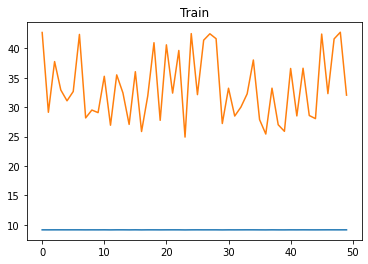

2/2 [==============================] - 5s 73ms/step


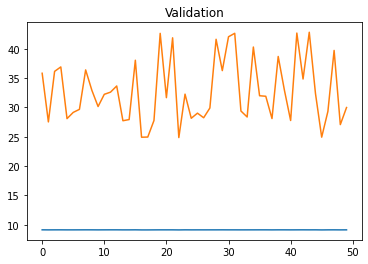

3/3 [==============================] - 0s 51ms/step


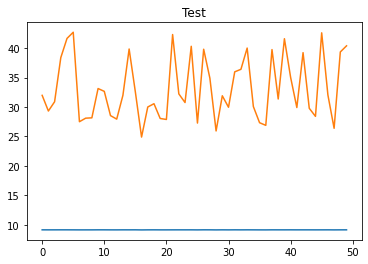

3/3 [==============================] - 0s 92ms/step


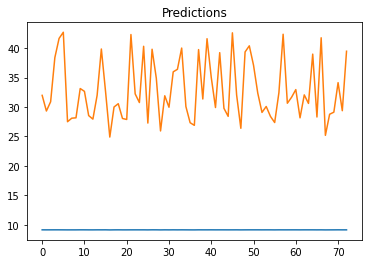

In [35]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [36]:
hybrid_cnn_gru_mse

587.5000617962502

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 979.3632 - root_mean_squared_error: 31.2948

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 62s 7s/step - loss: 979.3632 - root_mean_squared_error: 31.2948 - val_loss: 1007.1788 - val_root_mean_squared_error: 31.7361
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 940.8503 - root_mean_squared_error: 30.6733

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 935.0560 - root_mean_squared_error: 30.5787 - val_loss: 962.8590 - val_root_mean_squared_error: 31.0300
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 893.0043 - root_mean_squared_error: 29.8832

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 893.0043 - root_mean_squared_error: 29.8832 - val_loss: 921.7296 - val_root_mean_squared_error: 30.3600
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 854.0815 - root_mean_squared_error: 29.2247

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 854.0815 - root_mean_squared_error: 29.2247 - val_loss: 883.7812 - val_root_mean_squared_error: 29.7285
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 822.9416 - root_mean_squared_error: 28.6870

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 818.4111 - root_mean_squared_error: 28.6079 - val_loss: 849.0155 - val_root_mean_squared_error: 29.1379
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 778.6162 - root_mean_squared_error: 27.9037

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 785.5786 - root_mean_squared_error: 28.0282 - val_loss: 816.3554 - val_root_mean_squared_error: 28.5719
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 756.0875 - root_mean_squared_error: 27.4970

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 754.3315 - root_mean_squared_error: 27.4651 - val_loss: 784.6835 - val_root_mean_squared_error: 28.0122
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 724.0607 - root_mean_squared_error: 26.9084

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 724.0607 - root_mean_squared_error: 26.9084 - val_loss: 754.6263 - val_root_mean_squared_error: 27.4705
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 695.7527 - root_mean_squared_error: 26.3771

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 695.7527 - root_mean_squared_error: 26.3771 - val_loss: 726.7297 - val_root_mean_squared_error: 26.9579
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 672.5733 - root_mean_squared_error: 25.9340

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 669.6505 - root_mean_squared_error: 25.8776 - val_loss: 701.5554 - val_root_mean_squared_error: 26.4869
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 646.2456 - root_mean_squared_error: 25.4214

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 646.2456 - root_mean_squared_error: 25.4214 - val_loss: 679.1882 - val_root_mean_squared_error: 26.0612
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 625.5029 - root_mean_squared_error: 25.0101

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 625.5029 - root_mean_squared_error: 25.0101 - val_loss: 659.4010 - val_root_mean_squared_error: 25.6788
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 607.1121 - root_mean_squared_error: 24.6396

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 607.1121 - root_mean_squared_error: 24.6396 - val_loss: 641.4903 - val_root_mean_squared_error: 25.3277
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 590.2880 - root_mean_squared_error: 24.2958

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 590.2880 - root_mean_squared_error: 24.2958 - val_loss: 625.0604 - val_root_mean_squared_error: 25.0012
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 574.7281 - root_mean_squared_error: 23.9735

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 574.7281 - root_mean_squared_error: 23.9735 - val_loss: 609.3843 - val_root_mean_squared_error: 24.6857
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 559.8921 - root_mean_squared_error: 23.6620

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 559.8921 - root_mean_squared_error: 23.6620 - val_loss: 594.4637 - val_root_mean_squared_error: 24.3816
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 545.8234 - root_mean_squared_error: 23.3629

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 545.8234 - root_mean_squared_error: 23.3629 - val_loss: 580.4653 - val_root_mean_squared_error: 24.0928
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 532.6493 - root_mean_squared_error: 23.0792

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedfBODD.csv", index= False)

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")